# This Notebook shows how the disaggregation of energy consumption on the level of applications works for the sectors CTS and industry 

## 1. Imports

In [77]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot, heat
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use(['science','no-latex'])
import matplotlib
import matplotlib.ticker as mtick
from matplotlib import colors


In [78]:
path = './data_out/Diss/29_10_2022/'
path_plots = './data_out/Plots/30_10_2022/'

## 2. Plot Results


In [79]:
def plot_line(df, w_cm=12, title=None, f=1.8, ylabel='Verbrauch [TWh]', xlabel='', ylim=None, xlim=None, labels=['Test'], loc=None,
              ncol=None, coords=None, fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    ax.plot(df, 'o-', markersize=1.5, linewidth=lw)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax.legend(labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)

    date_form = DateFormatter("%d-%m")
    ax.xaxis.set_major_formatter(date_form)

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()
    
def plot_multi_line (df, w_cm=12, ylabel='Verbrauch [TWh]', xlabel='', ylim=None,
                     xlim=None, labels=None, loc=None, ncol=None, coords=None, fs=None, fig_name=None):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig, ax = plt.subplots(figsize=(w_in,(w_in/1.618)))
    
    df[0].plot(ax=ax, marker='o',markersize=1.5,linewidth=1.5)
    l = ax.get_lines()
    df[1].plot(ax=ax, linestyle='--', linewidth=1.5, color=list(i.get_color() for i in l))
    #plt.plot(, 'o-', markersize=2, linestyle='dashed')
    
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    plt.grid(True)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tick_params(axis='both', which='both', top=False, right=False)
    plt.legend(labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

def plot_bar(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True,
             ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fs_xticks=9,
             fig_name=None, lw=1, rot=0, ha='right', percentage=False, legend_labels=None):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha=ha, fontsize = fs_xticks)
    if legend:
        ax.legend(legend_labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

def plot_bar_c(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None,
               coords=None, fs=9, fs_xticks=9, fig_name=None, lw=1, rot=0, ha='right', percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3, color=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#add3e6', '#a5540c', '#a50c5d', '#9e9e9e'])
    #'0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha=ha, fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

def double_bar_plot(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True)
    negative_data.plot(ax=ax2, kind='bar', stacked=True)
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')

### 01/02 Sektoren

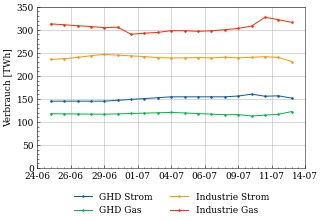

In [134]:
# 1 Bundesebene Zeitverlauf ohne Fuel Switch, Strom, Gas, GHD, Industrie 2001-2018
df_plot = pd.read_csv(path + '/01_results_Bundesebene_2001_2019.csv', header=[0,1], index_col=[0])

plot_line(df_plot/1000000, f= 1, ylim=(0,350), xlim=(2000, 2020),
          labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'], fs=9, loc=9,
          coords=(0.5, -0.1), ncol=2)

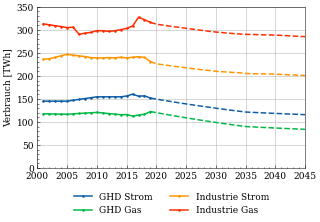

In [96]:
df_plot_2 = pd.read_csv(path + '/02_results_Bundesebene_2020_2050.csv', header=[0,1], index_col=[0])
plot_multi_line([df_plot/1000000, df_plot_2.append(df_plot.loc[2019]).sort_index()/1000000], w_cm=12, ylim=(0,350), xlim=(2000, 2045), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, fig_name = '01_Sektoren_Zeitverlauf')

In [144]:
(df_plot/1000000)#.loc[:,[('CTS', 'power')]].add((df_plot/1000000).loc[:,[('industry', 'power')]])

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2001           145.189739  117.947306  235.820151  312.963814
2002           145.201212  117.674464  237.349993  311.055531
2003           145.212684  117.401622  240.218309  308.936853
2004           145.224157  117.128780  243.885667  307.207274
2005           145.235630  116.855939  246.883180  304.845400
2006           147.116446  117.652547  245.055005  305.764505
2007           148.997262  118.449155  243.486849  290.470076
2008           150.878079  119.245763  241.996830  292.762659
2009           152.758895  120.042371  239.752751  294.455583
2010           154.639712  120.838979  239.120972  298.276484
2011           154.643467  119.578246  239.163605  298.055310
2012           154.647226  118.317514  239.914821  296.756569
2013           154.650985  117.056782  239.137461  297.930380
2014           154.654744  115.796049  240.578459  300.405920
2015           156.354308  116.112566  239.240468  303.066102
2016           160.417099  113.007109  240.502617  308.255497
2017           155.949694  115.013113  241.783854  327.267095
2018           156.772967  116.762349  240.146242  322.017864
2019           151.876367  122.668078  231.221619  316.248610

In [101]:
df_plot_2.append(df_plot.loc[2019]).sort_index()/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2019           160.442442  117.655348  236.314278  321.861026
2019           151.876367  122.668078  231.221619  316.248610
2020           157.062508  115.129901  229.961809  316.228617
2021           153.790544  112.668625  226.144149  313.652140
2022           150.622935  110.269745  222.542468  311.182966
2023           147.556194  107.931536  219.298459  308.682723
2024           144.586962  105.652328  215.730306  306.194357
2025           141.711996  103.430509  212.770025  303.762985
2026           138.928174  101.264508  209.412030  301.317208
2027           136.232488   99.152804  206.088037  298.912423
2028           133.622035   97.093924  202.636089  296.717341
2029           131.094026   95.086431  199.731131  294.378566
2030           128.645762   93.128943  196.753772  292.330210
2031           126.273770   91.220231  194.728261  290.751290
2032           123.976309   89.358880  192.603859  289.149131
2033           121.750969   87.543620  190.572896  287.588084
2034           119.595425   85.773223  188.340227  285.994091
2035           117.507436   84.046493  186.358274  284.537185
2036           116.645030   83.374803  185.954654  284.278586
2037           115.802068   82.713791  185.466548  283.996772
2038           114.978197   82.063273  184.922752  283.847567
2039           114.173071   81.423072  184.486003  283.806426
2040           113.386355   80.793012  184.278162  283.686826
2041           112.617721   80.172922  183.470873  282.946252
2042           111.866849   79.562635  182.647700  282.272555
2043           111.133427   78.961988  181.851437  281.716650
2044           110.417153   78.370820  181.079726  281.373582
2045           109.717729   77.788975  180.275382  280.551725
2046           109.034866   77.216301  179.537700  279.683740
2047           108.368283   76.652647  178.775344  278.878006
2048           107.717705   76.097869  178.005935  277.701941
2049           107.082864   75.551821  177.254233  277.228019
2050           106.463499   75.014366  176.546950  276.976019

### 03 Geoplot


In [717]:
df_geoplot = pd.read_csv(path + '/03_results_regio_2018.csv', header=[0,1], index_col=[0])
df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Erdgas"}, inplace=True)

In [718]:
(df_geoplot['GHD']['Strom']/df_geoplot['GHD']['Erdgas']).idxmax()#.sum()

'DE734'

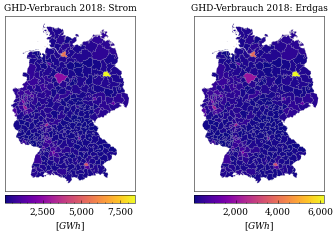

In [719]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="03_CTS_Consumption"


fig, ax = plot.choropleth_map(df_geoplot['GHD']/1000, relative=False, unit='GWh', axtitle='GHD-Verbrauch 2018:', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='plasma')

plt.savefig(path_plots + str(fig_name)+'.svg')

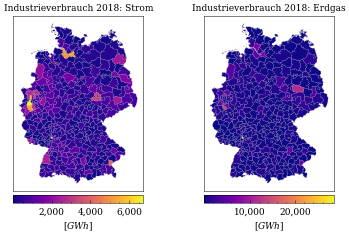

In [720]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="03_Industry_Consumption"


fig, ax = plot.choropleth_map(df_geoplot['Industrie']/1000, relative=False, unit='GWh', axtitle='Industrieverbrauch 2018:', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='plasma')

plt.savefig(path_plots + str(fig_name)+'.svg')

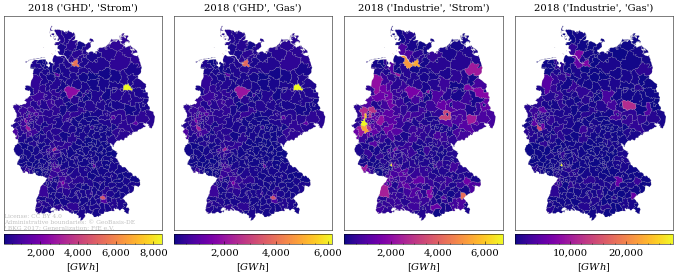

In [12]:
ec_combined = pd.concat([df_geoplot['GHD']/1000, df_geoplot['Industrie']/1000], keys=['GHD', 'Industrie'], axis=1, join='inner')
w_cm=24
w_in=w_cm/2.5
fig_name="03_Combined.svg"


fig, ax = plot.choropleth_map(df_geoplot/1000, relative=False, unit='GWh', axtitle='2018', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=10, linewidth=0.1, ncols=4, nrows=1, cmap='plasma')

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

### 04 zeitlich aufgelöst

In [122]:
df_strom_cts = pd.read_csv(path + "/04_results_lastgänge_regions_strom_cts_2018.csv", header=[0], index_col=[0])
df_gas_cts = pd.read_csv(path + "/04_results_lastgänge_regions_gas_cts_2018.csv", header=[0], index_col=[0])


In [123]:
df_strom_ind = pd.read_csv(path + "/04_results_lastgänge_regions_strom_industry_2018.csv", header=[0], index_col=[0])
df_gas_ind = pd.read_csv(path + "/04_results_lastgänge_regions_gas_industry_2018.csv", header=[0], index_col=[0])
df_gas_ind_with_KO = pd.read_csv(path + "/04_results_lastgänge_regions_gas_industry_2018_with_KO.csv", header=[0], index_col=[0])


In [124]:
df_strom_cts.index = pd.to_datetime(df_strom_cts.index)
df_strom_cts.columns = df_strom_cts.columns.astype(int)

df_gas_cts.index = pd.to_datetime(df_gas_cts.index)
df_gas_cts.columns = df_gas_cts.columns.astype(int)

df_strom_ind.index = pd.to_datetime(df_strom_ind.index)
df_strom_ind.columns = df_strom_ind.columns.astype(int)

df_gas_ind.index = pd.to_datetime(df_gas_ind.index)
df_gas_ind.columns = df_gas_ind.columns.astype(int)

df_gas_ind_with_KO.index = pd.to_datetime(df_gas_ind_with_KO.index)
df_gas_ind_with_KO.columns = df_gas_ind_with_KO.columns.astype(int)

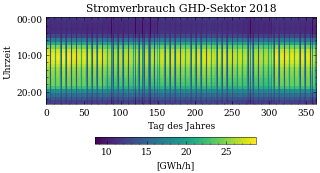

In [245]:
new_df=pd.DataFrame()
new_df['Stromverbrauch GHD-Sektor 2018'] = df_strom_cts.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig(path_plots + '/04_Lastgang_Strom_CTS_Year_2018.svg')

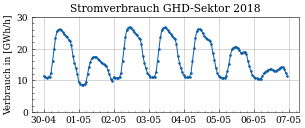

In [126]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Stromverbrauch GHD-Sektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,30), rot=0, fig_name='04_Lastgang_Strom_CTS_Woche_18')


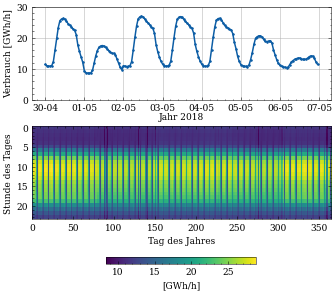

In [243]:
new_df=pd.DataFrame()
new_df['Stromverbrauch GHD 2018 in [GWh/h]'] = df_strom_cts.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,30)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig(path_plots + "04_Lastgang_Strom_cts_combined.svg")

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


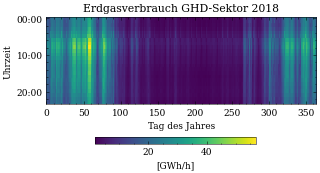

In [721]:
new_df=pd.DataFrame()
new_df['Erdgasverbrauch GHD-Sektor 2018'] = df_gas_cts.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig(path_plots + '/04_Lastgang_Gas_CTS_Year_2018.svg')

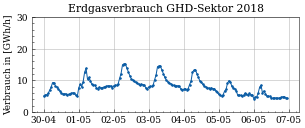

In [722]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Erdgasverbrauch GHD-Sektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,30), rot=0, fig_name='04_Lastgang_Gas_CTS_Woche_18')


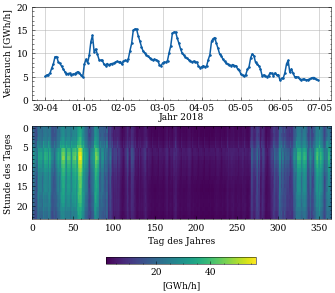

In [130]:
new_df=pd.DataFrame()
new_df['Gasverbrauch GHD 2018 in [GWh/h]'] = df_gas_cts.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,20)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)


#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Gas_cts_combined.svg")

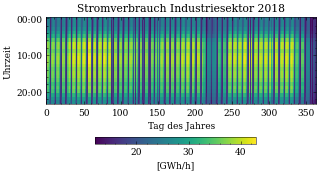

In [131]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industriesektor 2018'] = df_strom_ind.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig(path_plots + '/04_Lastgang_Strom_Industry_Year_2018.svg')

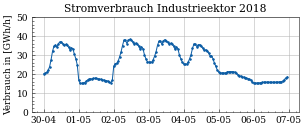

In [132]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Stromverbrauch Industrieektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,50), rot=0, fig_name='04_Lastgang_Strom_Industry_Woche_18')


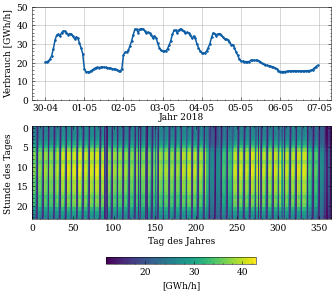

In [133]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industrie 2018 in [GWh/h]'] = df_strom_ind.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,50)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Strom_Industrie_combined.svg")

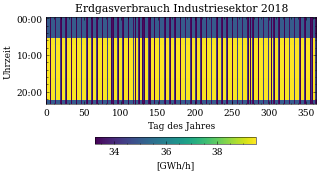

In [723]:
new_df=pd.DataFrame()
new_df['Erdgasverbrauch Industriesektor 2018'] = df_gas_ind.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig(path_plots + '/04_Lastgang_Gas_Industry_Year_2018.svg')

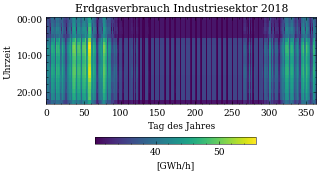

In [724]:
new_df=pd.DataFrame()
new_df['Erdgasverbrauch Industriesektor 2018'] = df_gas_ind_with_KO.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig(path_plots + '/04_Lastgang_Gas_Industry_Year_2018_with_KO.svg')

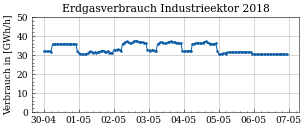

In [725]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Erdgasverbrauch Industrieektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,50), rot=0, fig_name='04_Lastgang_Gas_Industry_Woche_18')


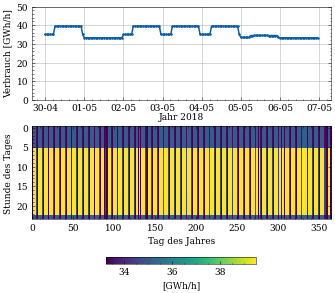

In [137]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industrie 2018 in [GWh/h]'] = df_gas_ind.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,50)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Gas_Industrie_combined.svg")

### 05 top je LK

In [11]:
df_geoplot = pd.read_csv(path + '/03_results_regio_2018.csv', header=[0,1], index_col=[0])
df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

In [12]:
df_geoplot_strom = pd.read_csv(path + '/05_results_regio_power_2018.csv', header=[0], index_col=[0])
#df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

In [13]:
df_geoplot_gas = pd.read_csv(path + '/05_results_regio_gas_2018.csv', header=[0], index_col=[0])


In [14]:
index_slice = pd.IndexSlice
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')

df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
big_power_idx= df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict).index

In [15]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
new_df = df_geoplot_strom.rename(index=region_dict).loc[big_power_idx]#.sort_values(by="Größter Stromverbrauch [MWh]", ascending=False).head(10).plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47
new_df['Stromverbrauch Landkreis [MWh]'] = df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
new_df.replace(config.dict_wz(), inplace=True)
new_df.to_excel(path + "/05_Top10_WZ_Elec.xlsx")
new_df

,Größter Stromverbrauch [MWh],WZ,Stromverbrauch Landkreis [MWh]
Hamburg,1.443811e+06,Chemieindustrie,1.096097e+07
Berlin,8.415458e+05,Einzelhandel,1.010710e+07
Rhein-Kreis Neuss,2.539876e+06,Metallerzeugung,7.491073e+06
"Ludwigshafen am Rhein, Kreisfreie Stadt",6.086470e+06,Chemieindustrie,6.895563e+06
"Duisburg, Kreisfreie Stadt",4.669010e+06,Metallerzeugung,6.473676e+06
Rhein-Erft-Kreis,2.004897e+06,Chemieindustrie,6.059509e+06
"Köln, Kreisfreie Stadt",6.773515e+05,Kohlenbergbau,5.758347e+06
"München, Kreisfreie Stadt",4.781930e+05,Fahrzeugbau,5.604117e+06
Stade,3.233647e+06,Chemieindustrie,5.422739e+06
"Frankfurt am Main, Kreisfreie Stadt",7.006157e+05,Chemieindustrie,4.641467e+06


In [16]:
index_slice = pd.IndexSlice
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')

df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
big_gas_idx = df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict).index

In [17]:
df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)


Ludwigshafen am Rhein, Kreisfreie Stadt    2.883502e+07
Köln, Kreisfreie Stadt                     1.667117e+07
Wittenberg                                 1.174823e+07
Hamburg                                    1.097359e+07
Berlin                                     7.429081e+06
Steinburg                                  7.170549e+06
Kelheim                                    5.645875e+06
Rheinisch-Bergischer Kreis                 5.580199e+06
Altötting                                  5.502749e+06
Recklinghausen                             5.306903e+06
dtype: float64

In [18]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
new_df= df_geoplot_gas.rename(index=region_dict).loc[big_gas_idx]#.sort_values(by="Größter Gasverbrauch [MWh]", ascending=False).head(10)#.plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47
new_df['Gasverbrauch Landkreis [MWh]'] = df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
new_df.replace(config.dict_wz(), inplace=True)
new_df.to_excel(path + "/05_Top10_WZ_Gas.xlsx")
new_df

#plt.bar_label(splot.containers[0])


#plt.figure(figsize=(8, 6))
#bplot=new_df.plot(kind='bar') 
#plt.xlabel("Continent", size=16)
#plt.ylabel("LifeExp", size=16)
#plt.bar_label()


#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

,Größter Gasverbrauch [MWh],WZ,Gasverbrauch Landkreis [MWh]
"Ludwigshafen am Rhein, Kreisfreie Stadt",2.750851e+07,Chemieindustrie,2.883502e+07
"Köln, Kreisfreie Stadt",6.405758e+06,Chemieindustrie,1.667117e+07
Wittenberg,6.724919e+06,Chemieindustrie,1.174823e+07
Hamburg,2.929292e+06,Kokerei & Mineralöl,1.097359e+07
Berlin,1.129901e+06,Landverkehr,7.429081e+06
Steinburg,1.550443e+06,Chemieindustrie,7.170549e+06
Kelheim,2.055591e+06,Kokerei & Mineralöl,5.645875e+06
Rheinisch-Bergischer Kreis,1.268880e+06,Nahrungsindustrie,5.580199e+06
Altötting,5.056519e+06,Chemieindustrie,5.502749e+06
Recklinghausen,1.786100e+06,Kokerei & Mineralöl,5.306903e+06


In [61]:
for k, v in new_df.iterrows():
    #print(k)
    print(v[1])

Chemieindustrie
Chemieindustrie
Chemieindustrie
Kokerei & Mineralöl
Glas & Keramik
Erziehung u.Unterricht
Kokerei & Mineralöl
Nahrungsindustrie
Chemieindustrie
Kokerei & Mineralöl


In [62]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
df_geoplot_strom.rename(index=region_dict)#.sort_values(by="Größter Stromverbrauch [MWh]", ascending=False).head(10).plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47

,Größter Stromverbrauch [MWh],WZ
"Flensburg, Kreisfreie Stadt",35775.697968,47
"Kiel, Kreisfreie Stadt",68295.874765,47
"Lübeck, Kreisfreie Stadt",62958.484066,47
"Neumünster, Kreisfreie Stadt",27609.757293,49
Dithmarschen,403089.448284,20
...,...,...
Saalfeld-Rudolstadt,141546.430115,20
Saale-Holzland-Kreis,53972.844574,24
Saale-Orla-Kreis,123744.288759,22
Greiz,34390.071777,20


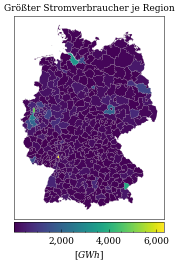

In [22]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="test"


fig, ax = plot.choropleth_map(df_geoplot['Größter Stromverbrauch [MWh]']/1000, relative=False, unit='GWh', axtitle='Größter Stromverbraucher je Region',
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

In [80]:
df_geoplot_gas = pd.read_csv('./data_out/Diss/05_results_regio_gas_2018.csv', header=[0], index_col=[0])


In [99]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
df_geoplot_gas.rename(index=region_dict).sort_values(by="Größter Gasverbrauch [MWh]", ascending=False).head(10)#.plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47

,Größter Gasverbrauch [MWh],WZ
"Ludwigshafen am Rhein, Kreisfreie Stadt",2.808248e+07,20
Wittenberg,6.347221e+06,20
"Köln, Kreisfreie Stadt",6.017444e+06,20
Altötting,5.164047e+06,20
Stade,3.541600e+06,20
Hamburg,2.857273e+06,19
"Duisburg, Kreisfreie Stadt",2.450364e+06,24
Saalekreis,2.184582e+06,20
Kelheim,1.912335e+06,19
"Krefeld, Kreisfreie Stadt",1.820767e+06,20


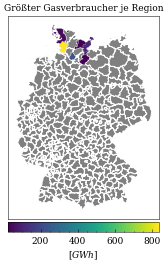

In [26]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="test"


fig, ax = plot.choropleth_map((df_geoplot_gas['Größter Gasverbrauch [MWh]']/1000).head(10), relative=False, unit='GWh', axtitle='Größter Gasverbraucher je Region',
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

### 07 Anwendungen

In [145]:
df_app_strom_cts = pd.read_csv(path + "/07_results_Anwendungen_WZ_2018_CTS_power.csv", header=[0], index_col=[0])
df_app_gas_cts = pd.read_csv(path + "/07_results_Anwendungen_WZ_2018_CTS_gas.csv", header=[0], index_col=[0])

df_app_strom_ind = pd.read_csv(path + "/07_results_Anwendungen_WZ_2018_industry_power.csv", header=[0], index_col=[0])
df_app_gas_ind = pd.read_csv(path + "/07_results_Anwendungen_WZ_2018_industry_gas.csv", header=[0], index_col=[0])

In [146]:
new_df_app = pd.concat([df_app_strom_cts, df_app_strom_ind])
new_df_plot = new_df_app.assign(sum=new_df_app.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:,:-1].head(10).rename(index=config.dict_wz())
new_df_plot.rename(columns={"Mechanische \nEnergie" : "Mechan. Energie"}, inplace=True)

In [147]:
new_df_plot['Prozesswärme2'] =new_df_plot.loc[:, ['Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C',
       'Prozesswärme <100°C', 'Prozesswärme >500°C']].sum(axis=1)
new_df_plot.loc['Einzelhandel', 'Prozesswärme2'] = new_df_plot.loc['Einzelhandel', 'Prozesswärme']
new_df_plot['Prozesswärme'] = new_df_plot['Prozesswärme2']
new_df_plot= new_df_plot[['Beleuchtung', 'IKT', 'Klimakälte', 'Mechanische Energie', 'Prozesskälte', 'Prozesswärme', 'Raumwärme', 'Warmwasser']]


In [148]:
df=pd.DataFrame()
df[['Mechanische Energie']] = new_df_plot[['Mechanische Energie']]
df[['Beleuchtung']] = new_df_plot[['Beleuchtung']]
df[['Prozesswärme']] = new_df_plot[['Prozesswärme']]
df[['Raumwärme']] = new_df_plot[['Raumwärme']]
df[['Prozesskälte']] = new_df_plot[['Prozesskälte']]

df[['Warmwasser']] = new_df_plot[['Warmwasser']]

df[['IKT']] = new_df_plot[['IKT']]
df[['Klimakälte']] = new_df_plot[['Klimakälte']]
new_df_plot = df.copy()

In [149]:
def plot_bar_c(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fs_xticks=9,
             fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3, color=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#a5540c', '#a50c5d', '#add3e6'])#'0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right', fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

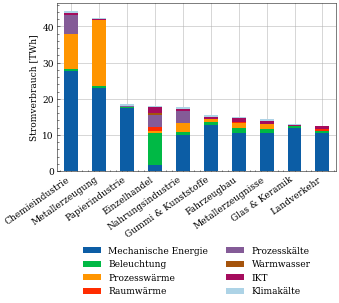

In [150]:
plot_bar_c(new_df_plot/1000000,
        ncol=2, loc='upper center', coords=[0.5, -0.4], ylabel='Stromverbrauch [TWh]', rot=35, fig_name='07_Top_10_Strom_Anwendung')

In [151]:
df_app_gas_ind_2 = df_app_gas_ind.assign(Prozesswärme=df_app_gas_ind[['Prozesswärme >500°C', 'Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C', 'Prozesswärme <100°C']].sum(axis=1))#
new_df_app = pd.concat([df_app_gas_cts, df_app_gas_ind_2]).iloc[:, :-4].fillna(0)
new_df_plot = new_df_app.assign(sum=new_df_app.sum(axis=1)).sort_values(by='sum', ascending=False).head(10).rename(index=config.dict_wz()).iloc[:, :-1]
new_df_plot.rename(columns={"Mechanische \nEnergie" : "Mechan. Energie", "Nichtenergetischer Erdgasverbrauch" : "Nichtenerget. Verbrauch",
                           "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)

In [152]:
def plot_bar_c(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fs_xticks=9,
             fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3, color=['#0C5DA5', '#9e9e9e', '#FF9500', '#FF2C00', '#a5540c', '#474747' ])#'0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right', fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

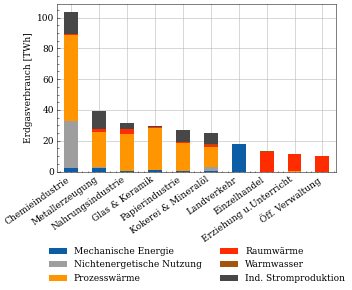

In [153]:
plot_bar_c(new_df_plot/1000000,
        ncol=2, loc='upper center', coords=[0.5, -0.4], ylabel='Erdgasverbrauch [TWh]', rot=35, fig_name='07_Top_10_Gas_Anwendung')#.plot(kind='bar', stacked=True) ,coords=[0.5, -0.08]

In [156]:
(new_df_plot/1000000).sum(axis=1)

WZ
Chemieindustrie           103.909526
Metallerzeugung            39.556965
Nahrungsindustrie          31.247478
Glas & Keramik             29.421422
Papierindustrie            26.972796
Kokerei & Mineralöl        24.754050
Landverkehr                17.799031
Einzelhandel               13.070278
Erziehung u.Unterricht     11.201854
Öff. Verwaltung            10.378806
dtype: float64

In [155]:
(new_df_plot/1000000)

,Mechanische Energie,Nichtenergetische Nutzung,Prozesswärme,Raumwärme,Warmwasser,Ind. Stromproduktion
WZ,,,,,,
Chemieindustrie,2.008058,30.973613,55.388928,0.769755,0.066935,14.702237
Metallerzeugung,2.178318,0.799810,22.767896,1.561133,0.132458,12.117350
Nahrungsindustrie,0.474268,0.000000,23.813265,3.170110,0.274576,3.515259
Glas & Keramik,0.950159,0.000000,27.247208,0.810430,0.083838,0.329787
Papierindustrie,0.364147,0.000000,18.425841,0.461253,0.048553,7.673002
Kokerei & Mineralöl,0.401521,2.729712,12.566121,1.754796,0.148711,7.153189
Landverkehr,17.585443,0.000000,0.000000,0.213588,0.000000,0.000000
Einzelhandel,0.000000,0.000000,0.000000,12.651771,0.418506,0.000000
Erziehung u.Unterricht,0.000000,0.000000,0.134962,10.931930,0.134962,0.000000


### 08 After fuel switch - Anwendungen

In [127]:
df_app_gas_rep_app = pd.read_csv(path + "/10_results_sectors_gas_replaced_by_elec_applications_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice

In [128]:
df_app_gas_rep_app_cts = df_app_gas_rep_app.loc[:, col_slice[:,'CTS']].iloc[:, 1:-1].dropna().droplevel(1, axis=1)
df_app_gas_rep_app_cts.columns=df_app_gas_rep_app_cts.columns.astype(int)

df_app_gas_rep_app_cts

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,8.041558e+05,4.542424e+06,7.843736e+06,1.075041e+07,1.381447e+07,1.675123e+07
Prozesswärme,1.742549e+05,9.996009e+05,1.756196e+06,2.454509e+06,3.205354e+06,3.956411e+06
Raumwärme,3.457126e+06,1.859725e+07,3.060967e+07,4.002464e+07,5.039497e+07,5.992975e+07
Warmwasser,1.900841e+05,1.027492e+06,1.699494e+06,2.232118e+06,2.823024e+06,3.372149e+06


In [129]:
df_app_gas_rep_app_ind = df_app_gas_rep_app.loc[:, col_slice[:,'industry']].iloc[:, 1:-1].dropna().droplevel(1, axis=1)
df_app_gas_rep_app_ind.columns=df_app_gas_rep_app_ind.columns.astype(int)

df_app_gas_rep_app_ind.rename(index={"Mechanische Energie" : "Mechanische Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)
df_app_gas_rep_app_ind

Jahre,2020,2025,2030,2035,2040,2045
Ind. Stromproduktion,1.985510e+06,1.158819e+07,2.071589e+07,2.940215e+07,3.781916e+07,4.592959e+07
Mechanische Energie,2.895853e+05,1.698491e+06,3.048953e+06,4.400111e+06,5.768164e+06,7.060659e+06
Prozesswärme 100°C-200°C,2.144169e+06,1.212444e+07,2.105723e+07,2.972715e+07,3.870651e+07,4.660531e+07
Prozesswärme 200°C-500°C,6.088109e+05,3.425429e+06,5.924212e+06,8.284305e+06,1.067073e+07,1.281259e+07
Prozesswärme <100°C,1.143889e+06,6.564670e+06,1.153832e+07,1.621352e+07,2.098282e+07,2.553187e+07
Raumwärme,1.102431e+06,6.266194e+06,1.088028e+07,1.508381e+07,1.938153e+07,2.329310e+07
Warmwasser,9.937899e+04,5.666348e+05,9.855490e+05,1.367602e+06,1.758661e+06,2.114160e+06


In [130]:
# elec on top CTS
df_app_elc_on_top_app_2020 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = df_app_elc_on_top_app_2045.copy()

df_app_elc_on_top_app = df_app_elc_on_top_app_2045.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app.columns = df_app_elc_on_top_app.columns.astype(int)
df_app_elc_on_top_app.sum()

Jahre
2020    1.619180e+06
2025    9.039455e+06
2030    1.486244e+07
2035    1.984394e+07
2040    2.528371e+07
2045    3.028395e+07
dtype: float64

In [131]:
# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = df_app_elc_on_top_app_2045_ind.copy()
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_2045_ind.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app_ind.columns = df_app_elc_on_top_app_ind.columns.astype(int)
df_app_elc_on_top_app_ind.rename(index={"Mechanische Energie" : "Mechanische Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)
df_app_elc_on_top_app_ind

Jahre,2020,2025,2030,2035,2040,2045
Ind. Stromproduktion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Mechanische Energie,1.287046e+05,7.548850e+05,1.355090e+06,1.955605e+06,2.563628e+06,3.138071e+06
Prozesswärme 100°C-200°C,1.805279e+06,1.025052e+07,1.764830e+07,2.506558e+07,3.269891e+07,3.938004e+07
Prozesswärme 200°C-500°C,5.591120e+05,3.145802e+06,5.440603e+06,7.608035e+06,9.799647e+06,1.176666e+07
Prozesswärme <100°C,7.781593e+05,4.491168e+06,7.707461e+06,1.099007e+07,1.427502e+07,1.734211e+07
Raumwärme,3.509321e+05,2.069968e+06,3.508418e+06,4.884744e+06,6.336387e+06,7.596906e+06
Warmwasser,4.053458e+04,2.341543e+05,3.932853e+05,5.559901e+05,7.189389e+05,8.636784e+05


In [132]:
# COP
(df_app_gas_rep_app_ind.multiply([1, 0.4, 0.9, 0.96, 0.9, 0.9])).div(df_app_elc_on_top_app_ind)

Jahre,2020,2025,2030,2035,2040,2045
Ind. Stromproduktion,inf,inf,inf,inf,inf,inf
Mechanische Energie,2.250000,0.900000,2.025000,2.160000,2.025000,2.025000
Prozesswärme 100°C-200°C,1.187722,0.473125,1.073843,1.138536,1.065352,1.065128
Prozesswärme 200°C-500°C,1.088889,0.435556,0.980000,1.045333,0.980000,0.980000
Prozesswärme <100°C,1.469994,0.584674,1.347329,1.416277,1.322908,1.325022
Raumwärme,3.141437,1.210878,2.791073,2.964425,2.752891,2.759517
Warmwasser,2.451709,0.967968,2.255345,2.361369,2.201571,2.203070


In [133]:
# Anteil Wärmepumpen an 100-200°C
sector= 'industry'
switch_to = 'power'
year = 2045

df_gas_switch = heat.sector_fuel_switch_fom_gas(sector, switch_to, year=year)
col = pd.IndexSlice

df_PW = df_gas_switch.loc[:, col[:, 'Prozesswärme 100°C-200°C']]


PATH = config.data_in("dimensionless", "fuel_switch_keys.xlsx")
df_electrode = pd.read_excel(PATH,
                                 sheet_name=("Gas2Power industry electrode"))
df_electrode = (df_electrode
                    .loc[[isinstance(x, int) for x in df_electrode["WZ"]]]
                    .set_index("WZ")
                    .copy())
# df_PW.groupby(axis=1, level=0).sum().sum().multiply(1-df_electrode.T).T.sum().sum()/10000000


2022-12-11 23:55:01 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-12-11 23:55:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [134]:
# gasverbrauch durch WP ersetzt
df_WP = df_PW.groupby(axis=1, level=0).sum().sum().multiply(1-df_electrode.T).T
df_WP.sum()

Prozesswärme 100°C-200°C    2.412401e+07
Prozesswärme 200°C-500°C    0.000000e+00
dtype: float64

In [135]:
# gasverbrauch durch elektrodenkessel ersetzt in 100-200°C
df_elec = df_PW.groupby(axis=1, level=0).sum().sum().multiply(df_electrode.iloc[:, 0].T).T
df_elec.sum()

22481302.290251695

In [136]:
test = pd.read_csv(path + "/12_results_elec_from_switch_industry_wz_2045.csv", header=[0,1], index_col=[0])#.dropna()
test.sum().sum()

80087469.1861266

In [137]:
test = pd.read_csv("./data_out/Diss/12_results_elec_from_switch_industry_wz_2045.csv", header=[0,1], index_col=[0])#.dropna()
test.sum().sum()

59140032.38005691

In [138]:
def plot_div_bar(df_gas, df_el, w_cm=14, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=0, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40]):
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, ax1 = plt.subplots(figsize=(w_in,(w_in/(1.618))))
    #ax1.axhspan(0, 40, facecolor='0.9', alpha=0.5)
    #ax1.axhspan(-80, 0, facecolor='0.6', alpha=0.5)
    
    ax2 = ax1.twinx()
    
    positive_data.plot(ax=ax1, kind='bar', stacked=True, width=-0.35, align='edge' ) # width=0.5, align='center'
    negative_data.plot(ax=ax2, kind='bar', stacked=True, width=(0.35), align='edge'  ) #width=-0.5, align='center'
    
    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax1.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2)
    ax1.set_xlabel(xlabel)
    
    ax1.set_ylim(ylim1)
    ax1.set_xlim([-0.5, 5.5])
    ax2.set_ylim(ylim2)
    
    ax1.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax2.legend().remove()
    
    yticks = ax1.yaxis.get_major_ticks()
    ymrange = range(0,4)
    for t in ymrange:
        yticks[t].set_visible(False)
    
    yticksm = ax1.yaxis.get_minor_ticks()
    ymrange = range(0,12)
    for t in ymrange:
        yticksm[t].set_visible(False)
    
    
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].set_visible(False)
    yticks[-2].set_visible(False)
    
    yticksm = ax2.yaxis.get_minor_ticks()
    ymrange = range(-6,0,1)
    for t in ymrange:
        yticksm[t].set_visible(False)
    
    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')

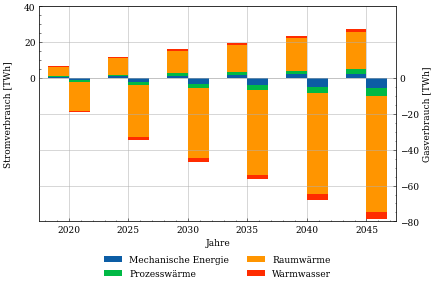

In [92]:
plot_div_bar(df_app_gas_rep_app_cts, df_app_elc_on_top_app, xlabel='Jahre', w_cm=16, ylabel1="Stromverbrauch [TWh]", ylabel2="Gasverbrauch [TWh]")

In [139]:
def double_bar_plot(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True)
    negative_data.plot(ax=ax2, kind='bar', stacked=True)
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')

In [140]:
def double_bar_plot_c(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True, zorder=3, color=['#0C5DA5', '#FF9500', '#FF2C00', '#a5540c'])
    negative_data.plot(ax=ax2, kind='bar', stacked=True, zorder=3, color=['#0C5DA5', '#FF9500', '#FF2C00', '#a5540c'])
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True, zorder=0)
    ax2.grid(True, zorder=0)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')

In [141]:
df_app_gas_rep_app_cts/1000000

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,0.804156,4.542424,7.843736,10.750411,13.814468,16.751226
Prozesswärme,0.174255,0.999601,1.756196,2.454509,3.205354,3.956411
Raumwärme,3.457126,18.597247,30.609666,40.024635,50.394972,59.929748
Warmwasser,0.190084,1.027492,1.699494,2.232118,2.823024,3.372149


In [142]:
df_app_elc_on_top_app/1000000

Jahre,2020,2025,2030,2035,2040,2045
Industriekraftwerke,,,,,,
Mechanische Energie,0.357403,2.018855,3.486105,4.777961,6.139764,7.444989
Prozesswärme,0.099629,0.577630,0.983819,1.400300,1.835558,2.263800
Raumwärme,1.084362,6.016683,9.710884,12.754208,16.149805,19.192732
Warmwasser,0.077787,0.426286,0.681635,0.911472,1.158588,1.382423


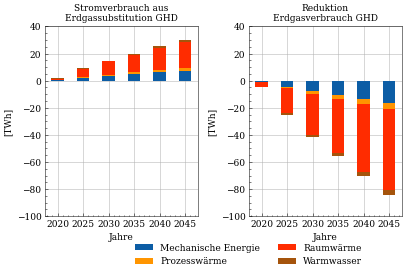

In [342]:
double_bar_plot_c(df_app_gas_rep_app_cts, df_app_elc_on_top_app,  w_cm=14.5, xlabel='Jahre', ylabel1="[TWh]",
                  ylabel2="[TWh]", coords=[-0, -0.1], rot=0, ylim1=[-100, 40], ylim2=[-100, 40],
                  title1='Stromverbrauch aus\nErdgassubstitution GHD', title2='Reduktion\nErdgasverbrauch GHD',
                  fig_name='10_gas_replaced_elec_on_top_cts')

In [143]:
def double_bar_plot_c(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True, zorder=3, color=['#0C5DA5', '#ffc000', '#FF9500', '#ff6a00', '#FF2C00', '#a5540c', '#474747' ]) # color=['#0C5DA5', '#FF9500', '#FF2C00', '#a5540c']
    negative_data.plot(ax=ax2, kind='bar', stacked=True, zorder=3, color=['#0C5DA5', '#ffc000', '#FF9500', '#ff6a00', '#FF2C00', '#a5540c', '#474747' ])
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True, zorder=0)
    ax2.grid(True, zorder=0)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')

In [144]:
df_app_gas_rep_app_ind = df_app_gas_rep_app_ind.reindex(['Mechanische Energie','Prozesswärme <100°C',
                                                         'Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C', 'Raumwärme',
                                                         'Warmwasser', 'Ind. Stromproduktion'])
df_app_gas_rep_app_ind

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,2.895853e+05,1.698491e+06,3.048953e+06,4.400111e+06,5.768164e+06,7.060659e+06
Prozesswärme <100°C,1.143889e+06,6.564670e+06,1.153832e+07,1.621352e+07,2.098282e+07,2.553187e+07
Prozesswärme 100°C-200°C,2.144169e+06,1.212444e+07,2.105723e+07,2.972715e+07,3.870651e+07,4.660531e+07
Prozesswärme 200°C-500°C,6.088109e+05,3.425429e+06,5.924212e+06,8.284305e+06,1.067073e+07,1.281259e+07
Raumwärme,1.102431e+06,6.266194e+06,1.088028e+07,1.508381e+07,1.938153e+07,2.329310e+07
Warmwasser,9.937899e+04,5.666348e+05,9.855490e+05,1.367602e+06,1.758661e+06,2.114160e+06
Ind. Stromproduktion,1.985510e+06,1.158819e+07,2.071589e+07,2.940215e+07,3.781916e+07,4.592959e+07


In [145]:
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_ind.reindex(['Mechanische Energie',
       'Prozesswärme <100°C','Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C',
        'Raumwärme', 'Warmwasser', 'Ind. Stromproduktion'])
df_app_elc_on_top_app_ind

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,1.287046e+05,7.548850e+05,1.355090e+06,1.955605e+06,2.563628e+06,3.138071e+06
Prozesswärme <100°C,7.781593e+05,4.491168e+06,7.707461e+06,1.099007e+07,1.427502e+07,1.734211e+07
Prozesswärme 100°C-200°C,1.805279e+06,1.025052e+07,1.764830e+07,2.506558e+07,3.269891e+07,3.938004e+07
Prozesswärme 200°C-500°C,5.591120e+05,3.145802e+06,5.440603e+06,7.608035e+06,9.799647e+06,1.176666e+07
Raumwärme,3.509321e+05,2.069968e+06,3.508418e+06,4.884744e+06,6.336387e+06,7.596906e+06
Warmwasser,4.053458e+04,2.341543e+05,3.932853e+05,5.559901e+05,7.189389e+05,8.636784e+05
Ind. Stromproduktion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [154]:
df_app_elc_on_top_app_ind.sum()

Jahre
2020    3.662721e+06
2025    2.094649e+07
2030    3.605316e+07
2035    5.106003e+07
2040    6.639253e+07
2045    8.008747e+07
dtype: float64

In [146]:
df_app_gas_rep_app_ind.div(df_app_elc_on_top_app_ind)*100

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
Prozesswärme <100°C,146.999372,146.168440,149.703205,147.528819,146.989789,147.224676
Prozesswärme 100°C-200°C,118.772190,118.281226,119.315923,118.597466,118.372490,118.347557
Prozesswärme 200°C-500°C,108.888889,108.888889,108.888889,108.888889,108.888889,108.888889
Raumwärme,314.143665,302.719383,310.119269,308.794318,305.876723,306.613008
Warmwasser,245.170882,241.992051,250.593888,245.975951,244.618947,244.785549
Ind. Stromproduktion,inf,inf,inf,inf,inf,inf


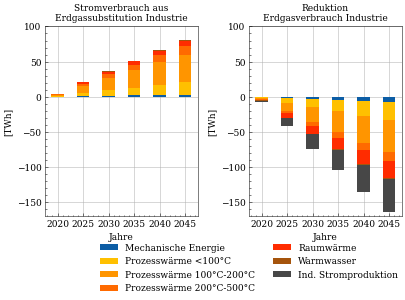

In [147]:
double_bar_plot_c(df_app_gas_rep_app_ind, df_app_elc_on_top_app_ind,  w_cm=14.5, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Stromverbrauch aus\nErdgassubstitution Industrie', title2='Reduktion\nErdgasverbrauch Industrie', fig_name='10_gas_replaced_elec_on_top_industry',
               ylim1=(-170,100),  ylim2=(-170,100))

In [148]:
df_app_gas_rep_hydro_app = pd.read_csv(path +"/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice

In [149]:
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

In [150]:
df_app_gas_rep_hydro_app_gas

Jahre,2020,2025,2030,2035,2040,2045
AWB,,,,,,
Prozesswärme >500°C,3.329070e+06,1.984038e+07,3.614143e+07,5.276305e+07,6.961797e+07,8.608945e+07
Nichtenergetische Nutzung,1.311310e+06,7.913519e+06,1.459330e+07,2.134877e+07,2.838402e+07,3.583720e+07


In [151]:
df_app_gas_rep_hydro_app_hydro.sum()

Jahre
2020    4.246987e+06
2025    2.537985e+07
2030    4.635674e+07
2035    6.770719e+07
2040    8.948678e+07
2045    1.111755e+08
dtype: float64

In [152]:
def double_bar_plot_c(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True, zorder=3,color=['#ff9500', '#9e9e9e'])
    negative_data.plot(ax=ax2, kind='bar', stacked=True, zorder=3, color=['#ff9500', '#9e9e9e'])
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True, zorder=0)
    ax2.grid(True, zorder=0)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')

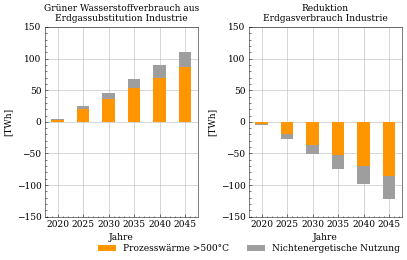

In [153]:
double_bar_plot_c(df_app_gas_rep_hydro_app_gas, df_app_gas_rep_hydro_app_hydro,  w_cm=14.5, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Grüner Wasserstoffverbrauch aus\nErdgassubstitution Industrie', title2='Reduktion\nErdgasverbrauch Industrie', fig_name='18_gas_replaced_hydro_on_top_industry',
               ylim1=(-150,150),  ylim2=(-150,150))

In [321]:
df_app_gas_rep_hydro_elec_app = pd.read_csv(path + "/19_results_electrolysis_industry_apps_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)
df_app_gas_rep_hydro_app_hydro_elec = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

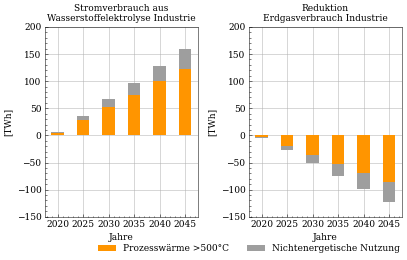

In [351]:
double_bar_plot_c(df_app_gas_rep_hydro_app_gas, df_app_gas_rep_hydro_app_hydro_elec/0.7,  w_cm=14.5, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Stromverbrauch aus\nWasserstoffelektrolyse Industrie', title2='Reduktion\nErdgasverbrauch Industrie', fig_name='19_gas_replaced_hydro_elec_on_top_industry',
               ylim1=(-150,200),  ylim2=(-150,200))

### 08 after fuel - Anwendungen absolut

#### Industrie

In [748]:
# inputs
# %% Parameters
years = range(2020, 2046, 1)
year = 2045
source = 'power'
sector = 'industry'
sectors = ['CTS', 'industry']
sources = ['power', 'gas']
disagg_ph = True
use_nuts3code = False
no_self_gen = False
detailed=False

In [749]:
df = spatial.disagg_applications_eff(source, sector, disagg_ph,
                                         use_nuts3code, no_self_gen, year=year)
df_anwendungen_2045 = df.groupby(axis=1, level=1).sum().sum()

df_app_elc_on_top_app_2045_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind_apps = df_app_elc_on_top_app_2045_ind.groupby(axis=1, level=0).sum().loc[:, '2045']


2022-11-09 21:44:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-11-09 21:44:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [750]:
df_plot_apps = pd.concat([df_anwendungen_2045, df_app_elc_on_top_app_2045_ind_apps], axis=1).fillna(0).sum(axis=1)

df_plot_apps_percentage = df_plot_apps[df_plot_apps!=0]/df_plot_apps[df_plot_apps!=0].sum()*100

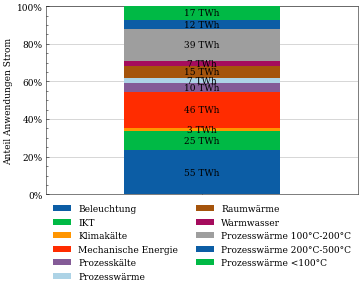

In [737]:

w_cm=14
w_in=w_cm/2.5
zorder_b=3
zorder_g=0
f=1
loc = 'upper center'
coords = [0.5, -.01]
ncol=2
fs=9

fig, ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f)))) 
plt.rcParams.update({'font.size':fs})
pd.DataFrame(df_plot_apps_percentage).T.plot(ax=ax, kind='bar', zorder=3, stacked=True,
                                             color=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#add3e6', '#a5540c', '#a50c5d', '#9e9e9e'])

ax.set_ylim(0, 100)
ax.set_ylabel('Anteil Anwendungen Strom')
ax.set_xlabel(None)
ax.tick_params(axis='both', which='both', top=False, right=False)
ax.set_xticklabels('')#labels=ax.get_xticklabels(), rotation=45, ha='right', fontsize = fs)
ax.grid(zorder=0)
rects = ax.patches
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Make some labels.
#labels = ["{:.0%}".format(p) for p in df_plot_h2_wz_plot['Wasserstoff'].tolist()]#.round(1)
n=0
labels = ["{0:.{1}f} TWh".format(p, n) for p in (df_plot_apps[df_plot_apps!=0]/1000000).tolist()]#.round(1)
height_last = 0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, (height/2 + height_last), label, ha="center", va="center", color='k'
    )
    height_last += height
ax.legend(loc=loc, bbox_to_anchor=(coords),ncol=ncol)
#plt.savefig(path_plots + '/Hydrogen_WZ_2045_stacked.svg')    



In [751]:
df_app_gas_rep_hydro_app = pd.read_csv(path + "/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app['2045']['Wasserstoff']/1000000

AWB
Prozesswärme >500°C          86.089445
Nichtenergetische Nutzung    25.086039
Name: Wasserstoff, dtype: float64

In [752]:
df_plot_apps/1000000#.index

Beleuchtung                   7.773576
IKT                           7.662093
Klimakälte                    4.001516
Mechanische Energie         138.719763
Prozesskälte                  8.746881
Prozesswärme 100°C-200°C     44.712732
Prozesswärme 200°C-500°C     13.829826
Prozesswärme <100°C          21.402809
Prozesswärme >500°C          24.667705
Raumwärme                     8.191787
Warmwasser                    1.260266
Industriekraftwerke           0.000000
dtype: float64

In [740]:
from pylab import *

cmap = cm.get_cmap('tab20')  # matplotlib color palette name, n colors
#for i in range(cmap.N):
#    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
#    print(matplotlib.colors.rgb2hex(rgb))

cmap = cm.get_cmap('tab20')
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list

['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5']

In [753]:
def plot_bar_c(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None,
               coords=None, fs=9, fs_xticks=9, fig_name=None, lw=1, rot=0, ha='center', percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    n = 20
    colors = plt.cm.tab20(np.linspace(0,1,n))
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3, color=[
        '#1f77b4',
        '#aec7e8',
        '#ff7f0e',
        '#ffbb78',
        '#2ca02c',
        '#98df8a',
        '#d62728',
        '#ff9896',
        '#9467bd',
        '#c5b0d5',
        '#8c564b',
        '#c49c94',
        '#e377c2',
        '#f7b6d2',
        '#7f7f7f',
        '#c7c7c7',
        '#bcbd22',
        '#dbdb8d',
        '#17becf',
        '#9edae5'])#colors)#['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#add3e6', '#a5540c', '#a50c5d', '#9e9e9e'])
    #'0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha=ha, fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

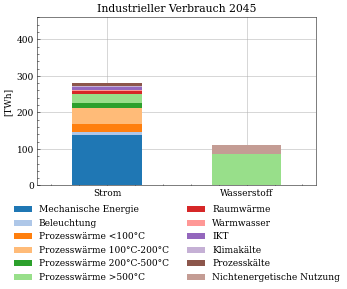

In [754]:
#neu
df=pd.DataFrame(index=['Mechanische Energie','Beleuchtung','Prozesswärme <100°C', 'Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C', 'Prozesswärme >500°C',
                       'Raumwärme', 'Warmwasser', 'IKT', 'Klimakälte',  'Prozesskälte', 'Nichtenergetische Nutzung'])        

df['Strom']=df_plot_apps/1000000
df['Wasserstoff']=df_app_gas_rep_hydro_app['2045']['Wasserstoff']/1000000

name= 'Industrieverbrauch_H2_Strom_nach_App_2045'
#df_plot_ind_elec = df.reindex(['Mechanische Energie', 'Prozesswärme', 'Prozesskälte', 'Beleuchtung', 'IKT', 
#                      'Klimakälte', 'Raumwärme', 'Warmwasser', 'Umwandlungssektor & Bergbau']).T

plot_bar_c(df.T, ncol=2, loc='upper center', coords=[0.5, -0.07], ylabel='[TWh]', ylim=(0, 460),
         fig_name=name, title='Industrieller Verbrauch 2045')#, 
#.plot(kind='bar', stacked=True)


In [755]:
df = spatial.disagg_applications_eff(source, sector, disagg_ph,
                                         use_nuts3code, no_self_gen, year=2020)
df_anwendungen_2020 = df.groupby(axis=1, level=1).sum().sum()

df_app_elc_on_top_app_2045_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()
df_plot_apps_2020 = pd.concat([df_anwendungen_2020, df_app_elc_on_top_app_2045_ind.groupby(axis=1, level=0).sum().loc[:, '2020']], axis=1).fillna(0).sum(axis=1)


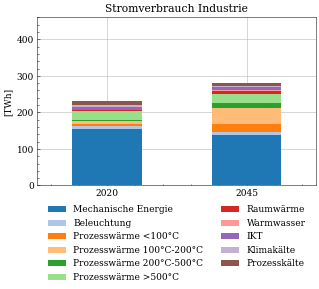

In [756]:
df_plot = pd.concat([df_plot_apps_2020.rename('2020'), df_plot_apps.rename('2045')], axis=1)/1000000
df_plot = df_plot.reindex(['Mechanische Energie','Beleuchtung','Prozesswärme <100°C', 'Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C', 'Prozesswärme >500°C',
                       'Raumwärme', 'Warmwasser', 'IKT', 'Klimakälte',  'Prozesskälte'])
name='Stromverbrauch_Industrie_Anwendungen_2020_2045'
plot_bar_c(df_plot.T, ncol=2, loc='upper center', coords=[0.5, -0.07], ylabel='[TWh]', ylim=(0, 460), # .drop('Industriekraftwerke', axis=1)
         fig_name=name, title='Stromverbrauch Industrie')#, 

#### GHD

In [111]:
# inputs
# %% Parameters
years = range(2020, 2046, 1)
year = 2045
source = 'power'
sector = 'CTS'
sectors = ['CTS', 'industry']
sources = ['power', 'gas']
disagg_ph = True
use_nuts3code = False
no_self_gen = False
detailed=False

In [112]:
df_cts = spatial.disagg_applications_eff(source, sector, disagg_ph,
                                         use_nuts3code, no_self_gen, year=year)
df_anwendungen_2045_cts = df_cts.groupby(axis=1, level=1).sum().sum()
df_app_elc_on_top_app_2045 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_cts_app_2045_after_switch = pd.concat([df_anwendungen_2045_cts, df_app_elc_on_top_app_2045.groupby(axis=1, level=0).sum().loc[:, '2045']], axis=1).fillna(0).sum(axis=1)
#df_app_elc_on_top_app_2045_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()
#df_app_elc_on_top_app_2045_ind_apps = df_app_elc_on_top_app_2045_ind.groupby(axis=1, level=0).sum().loc[:, '2045']


2022-11-16 22:10:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-11-16 22:11:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.


In [106]:
path = './data_out/Diss/29_10_2022/'
df_app_elc_on_top_app_2045_40 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_40.groupby(axis=1, level=0).sum()/1000000

Jahre,2020,2025,2030,2035,2040,2045
Industriekraftwerke,,,,,,
Mechanische Energie,0.357403,2.018855,3.486105,4.777961,6.139764,7.444989
Prozesswärme,0.099629,0.577630,0.983819,1.400300,1.835558,2.263800
Raumwärme,1.084362,6.016683,9.710884,12.754208,16.149805,19.192732
Warmwasser,0.077787,0.426286,0.681635,0.911472,1.158588,1.382423


In [109]:
(df_app_elc_on_top_app_2045_40.groupby(axis=1, level=0).sum()/1000000).sum()

Jahre
2020     1.619180
2025     9.039455
2030    14.862443
2035    19.843941
2040    25.283715
2045    30.283945
dtype: float64

In [114]:
df_cts_app_2045_after_switch.sum()

146203372.65957773

In [116]:
df_cts = spatial.disagg_applications_eff(source, sector, disagg_ph,
                                         use_nuts3code, no_self_gen, year=2020)
df_anwendungen_2020_cts = df_cts.groupby(axis=1, level=1).sum().sum()
df_cts_app_2020_after_switch = pd.concat([df_anwendungen_2020_cts, df_app_elc_on_top_app_2045.groupby(axis=1, level=0).sum().loc[:, '2020']], axis=1).fillna(0).sum(axis=1)

Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.


In [ ]:
df_cts_app_2020_after_switch.sum()

151268043.29942697

In [944]:
def plot_bar_c(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None,
               coords=None, fs=9, fs_xticks=9, fig_name=None, lw=1, rot=0, ha='center', percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    n = 20
    colors = plt.cm.tab20(np.linspace(0,1,n))
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3, color=[
        '#1f77b4',
        '#aec7e8',
        '#ff7f0e',
        # '#ffbb78',
        # '#2ca02c',
        # '#98df8a',
        '#d62728',
        '#ff9896',
        '#9467bd',
        '#c5b0d5',
        '#8c564b',
        '#c49c94',
        '#e377c2',
        '#f7b6d2',
        '#7f7f7f',
        '#c7c7c7',
        '#bcbd22',
        '#dbdb8d',
        '#17becf',
        '#9edae5'])#colors)#['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#add3e6', '#a5540c', '#a50c5d', '#9e9e9e'])
    #'0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha=ha, fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

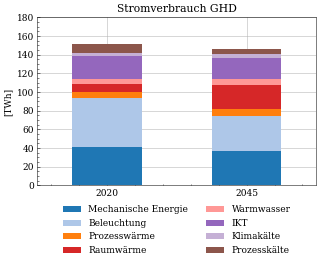

In [945]:
df_plot = pd.concat([df_cts_app_2020_after_switch.rename('2020'), df_cts_app_2045_after_switch.rename('2045')], axis=1)/1000000
df_plot = df_plot.reindex(['Mechanische Energie','Beleuchtung','Prozesswärme',
                      'Raumwärme', 'Warmwasser', 'IKT', 'Klimakälte',  'Prozesskälte'])

name='Stromverbrauch_GHD_Anwendungen_2020_2045'
plot_bar_c(df_plot.T, ncol=2, loc='upper center', coords=[0.5, -0.07], ylabel='[TWh]', ylim=(0, 180),
         fig_name=name, title='Stromverbrauch GHD')#, 

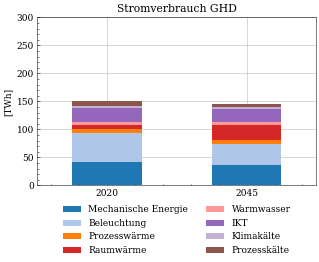

In [523]:
df_plot = pd.concat([df_cts_app_2020_after_switch.rename('2020'), df_cts_app_2045_after_switch.rename('2045')], axis=1)/1000000
df_plot = df_plot.reindex(['Mechanische Energie','Beleuchtung','Prozesswärme',
                      'Raumwärme', 'Warmwasser', 'IKT', 'Klimakälte',  'Prozesskälte'])

name=None#'Stromverbrauch_GHD_Anwendungen_2020_2045'
plot_bar_c(df_plot.T, ncol=2, loc='upper center', coords=[0.5, -0.07], ylabel='[TWh]', ylim=(0, 300),
         fig_name=name, title='Stromverbrauch GHD')#, 

### 09 after fuel - switch absolut

In [118]:
#path = './data_out/Diss/29_10_2022/'
#path = './data_out/Diss/06_11_2022/'

In [181]:
col_slice = pd.IndexSlice
df_gesamt_no_switch = pd.read_csv(path + '/02_results_Bundesebene_2020_2050.csv', header=[0,1], index_col=[0])

# for gas to be rep
df_app_gas_rep_el_app = pd.read_csv(path + "10_results_sectors_gas_replaced_by_elec_applications_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app = pd.read_csv(path + "/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)

# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv(path + "/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = df_app_elc_on_top_app_2045_ind.copy()
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_2045_ind.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app_ind.columns = df_app_elc_on_top_app_ind.columns.astype(int)

# elec on top CTS
df_app_elc_on_top_app_2020 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045 = pd.read_csv(path + "/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = df_app_elc_on_top_app_2045.copy()

df_app_elc_on_top_app = df_app_elc_on_top_app_2045.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app.columns = df_app_elc_on_top_app.columns.astype(int)

# hydro on top
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

# elec on top elektrolysers
df_app_gas_rep_hydro_app_elektrolysers = df_app_gas_rep_hydro_app_hydro/0.7


In [182]:
# cts
new_df = pd.DataFrame()
# gas no switch
new_df['Gas no switch'] = df_gesamt_no_switch['CTS', 'gas']
new_df

# gas rep by el
series_gas_rep_el = df_app_gas_rep_el_app.loc[:, col_slice[:,'CTS']].iloc[:, 1:-1].dropna().droplevel(1, axis=1).sum()  # rep by elec
series_gas_rep_el.index = series_gas_rep_el.index.astype(int)
new_df['Gas rep by el'] =series_gas_rep_el  # rep by elec

# gas rep abs
new_df['Gasverbrauch'] = (new_df['Gas no switch'] - new_df['Gas rep by el'])
new_df.dropna(inplace=True)

# elec no switch
new_df['Power no switch'] = df_gesamt_no_switch['CTS', 'power']

# power on top from switch
series_elec_on_top = df_app_elc_on_top_app.sum()
series_elec_on_top.index = series_elec_on_top.index.astype(int)
new_df['Power on top from switch'] = series_elec_on_top

# power absolut switch only no elektrolysers
new_df['Stromverbrauch'] =(new_df['Power no switch'] + new_df['Power on top from switch'])
new_df_cts = new_df

In [183]:
new_df_cts/1000000

,Gas no switch,Gas rep by el,Gasverbrauch,Power no switch,Power on top from switch,Stromverbrauch
2020,120.266127,4.625620,1.156405e+02,149.648863,1.619180,151.268043
2025,109.055982,25.166765,8.388922e+01,139.240582,9.039455,148.280037
2030,99.057852,41.909091,5.714876e+01,129.942957,14.862443,144.805399
2035,90.125221,55.461674,3.466355e+01,121.626103,19.843941,141.470044
2040,86.961108,70.237818,1.672329e+01,118.624707,25.283715,143.908422
2045,84.009534,84.009534,4.470348e-14,115.919427,30.283945,146.203373


In [184]:
# industry
new_df = pd.DataFrame()
# gas no switch
new_df['Gas no switch'] = df_gesamt_no_switch['industry', 'gas']

# gas rep by el
series_gas_rep_el = df_app_gas_rep_el_app.loc[:, col_slice[:,'industry']].iloc[:, 1:-1].dropna().droplevel(1, axis=1).sum()  # rep by elec
series_gas_rep_el.index = series_gas_rep_el.index.astype(int)
new_df['Gas rep by el'] =series_gas_rep_el  # rep by elec
# gas rep by hydro
series_gas_rep_hydro = df_app_gas_rep_hydro_app_gas.sum()
series_gas_rep_hydro.index = series_gas_rep_hydro.index.astype(int)
new_df['Gas rep by hydro'] =series_gas_rep_hydro  # rep by hydro
# gas rep abs
new_df['Gasverbrauch'] = (new_df['Gas no switch'] - new_df['Gas rep by el']-new_df['Gas rep by hydro'])
new_df.dropna(inplace=True)

# elec no switch
new_df['Power no switch'] = df_gesamt_no_switch['industry', 'power']

# power on top from switch
series_elec_on_top = df_app_elc_on_top_app_ind.sum()
series_elec_on_top.index = series_elec_on_top.index.astype(int)
new_df['Power on top from switch'] = series_elec_on_top
# power absolut switch only no elektrolysers
new_df['Stromverbrauch \n(keine Elektrolyse)'] =(new_df['Power no switch'] + new_df['Power on top from switch'])

# power on top from electrolyis
series_power_elektrolysers = df_app_gas_rep_hydro_app_elektrolysers.sum()
series_power_elektrolysers.index = series_power_elektrolysers.index.astype(int)
new_df['Power on top from elektrolysis'] = series_power_elektrolysers
# power absolut switch only with elektrolysers
new_df['Stromverbrauch \n(100% Elektrolyse)'] =(new_df['Power no switch'] + new_df['Power on top from switch'] + new_df['Power on top from elektrolysis'])

# hydrogen on top
series_hydrogen = df_app_gas_rep_hydro_app_hydro.sum()
series_hydrogen.index = series_hydrogen.index.astype(int)
new_df['Wasserstoffverbrauch'] = series_hydrogen


In [185]:
(new_df)/1000000

,Gas no switch,Gas rep by el,Gas rep by hydro,Gasverbrauch,Power no switch,Power on top from switch,Stromverbrauch \n(keine Elektrolyse),Power on top from elektrolysis,Stromverbrauch \n(100% Elektrolyse),Wasserstoffverbrauch
2020,312.368033,7.373775,4.640380,3.003539e+02,226.204844,3.662721,229.867566,6.067125,235.934690,4.246987
2025,303.281119,42.234049,27.753901,2.332932e+02,217.564473,20.946494,238.510967,36.256922,274.767889,25.379845
2030,295.183105,74.150433,50.734727,1.702979e+02,210.039403,36.053155,246.092558,66.223910,312.316468,46.356737
2035,290.209512,104.478647,74.111822,1.116190e+02,205.388291,51.060026,256.448317,96.724557,353.172874,67.707190
2040,288.587086,135.087580,98.001989,5.549752e+01,203.899765,66.392529,270.292294,127.838260,398.130554,89.486782
2045,285.273931,163.347286,121.926644,-2.682209e-13,200.881484,80.087469,280.968953,158.822121,439.791074,111.175485


In [9]:
def plot_bar_grouped(df, w_cm=14, title=None, ylabel='Verbrauch [TWh]', xlabel='', stacked=False, ylim=None, xlim=None, loc='upper center', ncol=2, coords=[0,0], fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked, zorder=3)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True, zorder=0)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right')
    ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)
    #plt.tight_layout()

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

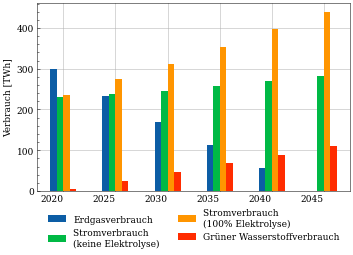

In [10]:
# (new_df['Gasverbrauch absolut']/1000000).plot(kind='bar')
df_plot = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
plot_bar_grouped(df_plot.rename(columns={'Gasverbrauch':'Erdgasverbrauch', 'Wasserstoffverbrauch':'Grüner Wasserstoffverbrauch'})
                 , w_cm=14, coords=[0.5,-0.05], fig_name='16_industry_post_switch')

##### plot industrieverbrauch grouped stacked

In [124]:
#call
df_plot = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
df_1=pd.DataFrame(index = new_df.index) #, columns = ['Gasverbrauch', 'Stromverbrauch', 'Wasserstoffverbrauch']
df_2=pd.DataFrame(index = new_df.index, columns = ['Gasverbrauch', 'Stromverbrauch', 'Wasserstoffverbrauch']) #, columns = ['Gasverbrauch', 'Stromverbrauch', 'Wasserstoffverbrauch']

df_1['Gasverbrauch'] = new_df[['Gasverbrauch']]/1000000
df_1['Stromverbrauch'] =  new_df[['Stromverbrauch \n(keine Elektrolyse)']]/1000000
df_1['Wasserstoffverbrauch'] =  new_df[['Wasserstoffverbrauch']]/1000000

#df_2 = new_df[['Stromverbrauch \n(100% Elektrolyse)']].sub(new_df[['Stromverbrauch \n(keine Elektrolyse)']].values)
df_2['Stromverbrauch'] = new_df[['Stromverbrauch \n(100% Elektrolyse)']].sub(new_df[['Stromverbrauch \n(keine Elektrolyse)']].values)/1000000
df_2 = df_2.fillna(0)

In [125]:
df_1.rename(columns={'Gasverbrauch':'Erdgasverbrauch', 'Wasserstoffverbrauch':'Grüner Wasserstoffverbrauch'}, inplace=True)
df_2.rename(columns={'Gasverbrauch':'Erdgasverbrauch', 'Wasserstoffverbrauch':'Grüner Wasserstoffverbrauch'}, inplace=True)

In [128]:
df_1+df_2

,Erdgasverbrauch,Stromverbrauch,Grüner Wasserstoffverbrauch
2020,3.003539e+02,235.934690,4.246987
2025,2.332932e+02,274.767889,25.379845
2030,1.702979e+02,312.316468,46.356737
2035,1.116190e+02,353.172874,67.707190
2040,5.549752e+01,398.130554,89.486782
2045,-2.682209e-13,439.791074,111.175485


In [127]:
df_2

,Erdgasverbrauch,Stromverbrauch,Grüner Wasserstoffverbrauch
2020,0,6.067125,0
2025,0,36.256922,0
2030,0,66.223910,0
2035,0,96.724557,0
2040,0,127.838260,0
2045,0,158.822121,0


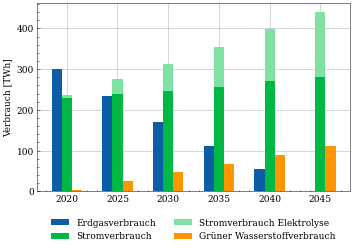

In [13]:
# '0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'
w_cm =14
f=1
xlabel=None
ylabel='Verbrauch [TWh]'
fig_name='16_industry_post_switch_stacked_grouped'

w_in=w_cm/2.5
zorder_b=3
zorder_g=0
loc = 'upper center'
coords = [0.5, -.1]
ncol=2
fig, ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f)))) 

#months = np.arange(1, len(agg_list[0]['data'][0].index) + 1, 1)
ax.bar(df_1.index-1, df_1['Erdgasverbrauch'].values, color='#0C5DA5', label='Erdgasverbrauch', width=1, zorder=zorder_b)
ax.bar(df_1.index-1, df_2['Erdgasverbrauch'].values, bottom= df_1['Erdgasverbrauch'].values, color='#0C5DA5', label='', width=1, zorder=zorder_b)

ax.bar(df_1.index, df_1['Stromverbrauch'].values, color='#00B945', label='Stromverbrauch', width=1, zorder=zorder_b)
ax.bar(df_1.index, df_2['Stromverbrauch'].values, bottom= df_1['Stromverbrauch'].values, color='#7ee2a3', label='Stromverbrauch Elektrolyse', width=1, zorder=zorder_b)

ax.bar(df_1.index+1, df_1['Grüner Wasserstoffverbrauch'].values, color='#FF9500', label='Grüner Wasserstoffverbrauch', width=1, zorder=zorder_b)
ax.bar(df_1.index+1, df_2['Grüner Wasserstoffverbrauch'].values, bottom= df_1['Grüner Wasserstoffverbrauch'].values, color='#FF9500', label='', width=1, zorder=zorder_b)

ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
ax.grid(zorder=zorder_g)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis='both', which='both', top=False, right=False)
#ax.set_title('Industriesektor')
plt.savefig(path_plots + str(fig_name)+'.svg')

##### end plot cts grouped stacked

In [130]:
new_df_cts/1000000


,Gas no switch,Gas rep by el,Gasverbrauch,Power no switch,Power on top from switch,Stromverbrauch
2020,120.266127,4.625620,1.156405e+02,149.648863,1.619180,151.268043
2025,109.055982,25.166765,8.388922e+01,139.240582,9.039455,148.280037
2030,99.057852,41.909091,5.714876e+01,129.942957,14.862443,144.805399
2035,90.125221,55.461674,3.466355e+01,121.626103,19.843941,141.470044
2040,86.961108,70.237818,1.672329e+01,118.624707,25.283715,143.908422
2045,84.009534,84.009534,4.470348e-14,115.919427,30.283945,146.203373


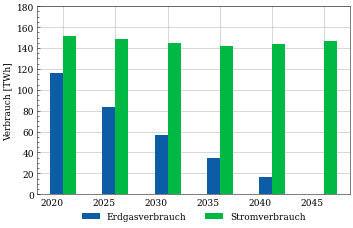

In [16]:
new_df_cts
# (new_df['Gasverbrauch absolut']/1000000).plot(kind='bar')
df_plot = new_df_cts[['Gasverbrauch', 'Stromverbrauch']]/1000000
plot_bar_grouped(df_plot.rename(columns={'Gasverbrauch':'Erdgasverbrauch'}), w_cm=14, coords=[0.5,-0.05], 
                 fig_name='16_cts_post_switch', ylim=(0,180)) # ,title='GHD Sektor'

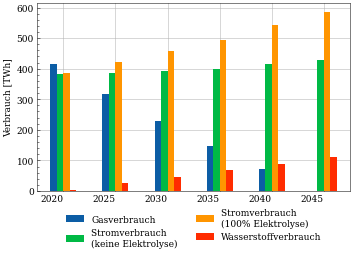

In [927]:
df_plot_1 = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
df_plot_2 = new_df_cts[['Gasverbrauch', 'Stromverbrauch']]/1000000
df_plot_3 = pd.DataFrame()
df_plot_3['Gasverbrauch'] = df_plot_1['Gasverbrauch'].add(df_plot_2['Gasverbrauch'])
df_plot_3['Stromverbrauch \n(keine Elektrolyse)'] = df_plot_1['Stromverbrauch \n(keine Elektrolyse)'].add(df_plot_2['Stromverbrauch'])
df_plot_3['Stromverbrauch \n(100% Elektrolyse)'] = df_plot_1['Stromverbrauch \n(100% Elektrolyse)'].add(df_plot_2['Stromverbrauch'])
df_plot_3['Wasserstoffverbrauch'] = df_plot_1['Wasserstoffverbrauch']

plot_bar_grouped(df_plot_3, w_cm=14, coords=[0.5,-0.05], fig_name='16_cts+industry_post_switch')

##### plot gesamtverbrauch grouped stacked

In [928]:
df_plot_3

,Gasverbrauch,Stromverbrauch \n(keine Elektrolyse),Stromverbrauch \n(100% Elektrolyse),Wasserstoffverbrauch
2020,4.159944e+02,381.135609,387.202734,4.246987
2025,3.171824e+02,386.791004,423.047926,25.379845
2030,2.274467e+02,390.897958,457.121867,46.356737
2035,1.462826e+02,397.918361,494.642918,67.707190
2040,7.222081e+01,414.200716,542.038976,89.486782
2045,-2.235174e-13,427.172326,585.994447,111.175485


In [929]:
#call
df_plot = df_plot_3[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]
df_1=pd.DataFrame(index = new_df.index) #, columns = ['Gasverbrauch', 'Stromverbrauch', 'Wasserstoffverbrauch']
df_2=pd.DataFrame(index = new_df.index, columns = ['Gasverbrauch', 'Stromverbrauch', 'Wasserstoffverbrauch']) #, columns = ['Gasverbrauch', 'Stromverbrauch', 'Wasserstoffverbrauch']

df_1['Gasverbrauch'] = df_plot_3[['Gasverbrauch']]
df_1['Stromverbrauch'] =  df_plot_3[['Stromverbrauch \n(keine Elektrolyse)']]
df_1['Wasserstoffverbrauch'] =  df_plot_3[['Wasserstoffverbrauch']]

#df_2 = new_df[['Stromverbrauch \n(100% Elektrolyse)']].sub(new_df[['Stromverbrauch \n(keine Elektrolyse)']].values)
df_2['Stromverbrauch'] = df_plot_3[['Stromverbrauch \n(100% Elektrolyse)']].sub(df_plot_3[['Stromverbrauch \n(keine Elektrolyse)']].values)
df_2 = df_2.fillna(0)


In [930]:
df_1.rename(columns={'Gasverbrauch':'Erdgasverbrauch', 'Wasserstoffverbrauch':'Grüner Wasserstoffverbrauch'}, inplace=True)
df_2.rename(columns={'Gasverbrauch':'Erdgasverbrauch', 'Wasserstoffverbrauch':'Grüner Wasserstoffverbrauch'}, inplace=True)

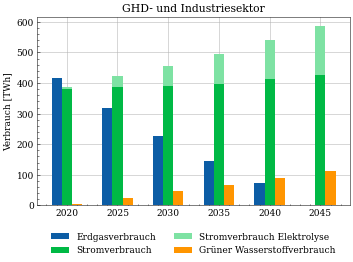

In [932]:
# '0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'
w_cm =14
f=1
xlabel=None
ylabel='Verbrauch [TWh]'
fig_name='16_cts+industry_post_switch_stacked_grouped'

w_in=w_cm/2.5
zorder_b=3
zorder_g=0
loc = 'upper center'
coords = [0.5, -.1]
ncol=2
fig, ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f)))) 

#months = np.arange(1, len(agg_list[0]['data'][0].index) + 1, 1)
ax.bar(df_1.index-1, df_1['Erdgasverbrauch'].values, color='#0C5DA5', label='Erdgasverbrauch', width=1, zorder=zorder_b)
ax.bar(df_1.index-1, df_2['Erdgasverbrauch'].values, bottom= df_1['Erdgasverbrauch'].values, color='#0C5DA5', label='', width=1, zorder=zorder_b)

ax.bar(df_1.index, df_1['Stromverbrauch'].values, color='#00B945', label='Stromverbrauch', width=1, zorder=zorder_b)
ax.bar(df_1.index, df_2['Stromverbrauch'].values, bottom= df_1['Stromverbrauch'].values, color='#7ee2a3', label='Stromverbrauch Elektrolyse', width=1, zorder=zorder_b)

ax.bar(df_1.index+1, df_1['Grüner Wasserstoffverbrauch'].values, color='#FF9500', label='Grüner Wasserstoffverbrauch', width=1, zorder=zorder_b)
ax.bar(df_1.index+1, df_2['Grüner Wasserstoffverbrauch'].values, bottom= df_1['Grüner Wasserstoffverbrauch'].values, color='#FF9500', label='', width=1, zorder=zorder_b)

ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
ax.grid(zorder=zorder_g)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis='both', which='both', top=False, right=False)
ax.set_title('GHD- und Industriesektor')
plt.savefig(path_plots + str(fig_name)+'.svg')

### 10 after fuel-switch regional results

In [155]:
col_slice = pd.IndexSlice

# for gas to be rep
df_app_gas_left_after_elec = pd.read_csv(path + "/09_cts_industry_gas_left_after_switch_regions_years.csv", header=[0,1], index_col=[0]).groupby(level=0, axis=1).sum()
df_app_gas_left_after_elec.columns = df_app_gas_left_after_elec.columns.astype(int)

df_app_gas_rep_hydro_app = pd.read_csv(path + "/18_results_gas_replaced_hydro_industry_regions_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1).rename(config.dict_region_code(keys='ags_lk'), axis=0)
df_app_gas_rep_hydro_app_gas.columns = df_app_gas_rep_hydro_app_gas.columns.astype(int)

# elec before switch
df_elec_before_switch_cts = pd.read_csv(path + "/15_cts_electricity_before_switch_years_regions.csv", header=0, index_col=[0])
df_elec_before_switch_ind = pd.read_csv(path + "/15_industry_electricity_before_switch_years_regions.csv", header=0, index_col=[0])

df_elec_before_switch = df_elec_before_switch_cts.add(df_elec_before_switch_ind)
df_elec_before_switch.columns = df_elec_before_switch.columns.astype(int)


# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv(path + "/11_results_elec_from_switch_industry_regions_2020.csv", header=0, index_col=[0], names=[2020]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv(path + "/11_results_elec_from_switch_industry_regions_2025.csv", header=0, index_col=[0], names=[2025]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv(path + "/11_results_elec_from_switch_industry_regions_2030.csv", header=0, index_col=[0], names=[2030]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv(path + "/11_results_elec_from_switch_industry_regions_2035.csv", header=0, index_col=[0], names=[2035]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv(path + "/11_results_elec_from_switch_industry_regions_2040.csv", header=0, index_col=[0], names=[2040]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv(path + "/11_results_elec_from_switch_industry_regions_2045.csv", header=0, index_col=[0], names=[2045]).dropna()

df_app_elc_on_top_app_state_ind = (pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
                                   .rename(config.dict_region_code(keys='ags_lk'), axis=0))

# elec on top CTS
df_app_elc_on_top_app_2020 = pd.read_csv(path + "/11_results_elec_from_switch_cts_regions_2020.csv", header=0, index_col=[0], names=[2020])
df_app_elc_on_top_app_2025 = pd.read_csv(path + "/11_results_elec_from_switch_cts_regions_2025.csv", header=0, index_col=[0], names=[2025])
df_app_elc_on_top_app_2030 = pd.read_csv(path + "/11_results_elec_from_switch_cts_regions_2030.csv", header=0, index_col=[0], names=[2030])
df_app_elc_on_top_app_2035 = pd.read_csv(path + "/11_results_elec_from_switch_cts_regions_2035.csv", header=0, index_col=[0], names=[2035])
df_app_elc_on_top_app_2040 = pd.read_csv(path + "/11_results_elec_from_switch_cts_regions_2040.csv", header=0, index_col=[0], names=[2040])
df_app_elc_on_top_app_2045 = pd.read_csv(path + "/11_results_elec_from_switch_cts_regions_2045.csv", header=0, index_col=[0], names=[2045])

df_app_elc_on_top_app_state_cts = (pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
                                   .rename(config.dict_region_code(keys='ags_lk'), axis=0))

# hydro on top
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1).rename(config.dict_region_code(keys='ags_lk'), axis=0)
df_app_gas_rep_hydro_app_hydro.columns = df_app_gas_rep_hydro_app_hydro.columns.astype(int)

# elec on top elektrolysers
df_app_gas_rep_hydro_app_elektrolysers = df_app_gas_rep_hydro_app_hydro/0.7


#### gas

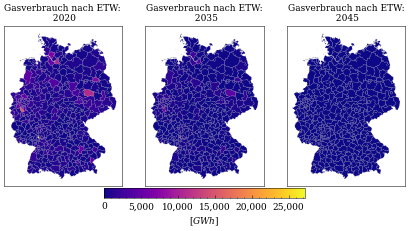

In [172]:
# plot gas abs
years=[2020, 2035, 2045]
df_plot = (df_app_gas_left_after_elec[years]).sub(df_app_gas_rep_hydro_app_gas[years])#.drop('DEB34')

w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_gas_after_switch_years"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Gasverbrauch nach ETW:\n', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='plasma')#cmap='YlGnBu'
plt.savefig(path_plots+str(fig_name)+'.svg')

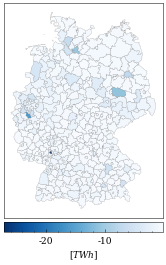

In [170]:
# plot gas rel

year1=2020
year2=2045
df_1 = (df_app_gas_left_after_elec[year1]).sub(df_app_gas_rep_hydro_app_gas[year1])
df_2 = (df_app_gas_left_after_elec[year2]).sub(df_app_gas_rep_hydro_app_gas[year2])

df_plot = ((df_2-df_1))/1000000

#((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=14
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_gas_after_switch_years_delta_absolut"


fig, ax = plot.choropleth_map(df_plot, relative=False, unit='TWh', axtitle='', #Absolute Veränderung des\nErdgasverbrauchs: 2045 vs. 2020
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, license_tag=False, cmap='Blues_r', delta=False,
                             edgecolor='dimgrey', linewidth=0.15)#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

#### strom

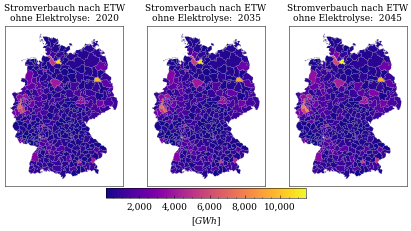

In [174]:
# plot elec abs
years=[2020, 2035, 2045]
df_plot = ((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_no_electrolysis"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Stromverbauch nach ETW\nohne Elektrolyse: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='plasma')#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

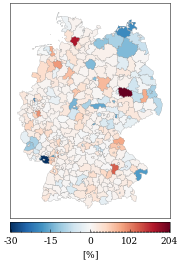

In [171]:
# plot elec delta relativ
year1=2020
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2])


df_plot = ((df_2-df_1)/df_1)*100

#((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=14
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_no_electrolysis_delta_relativ"


fig, ax = plot.choropleth_map(df_plot, relative=False, unit='%', axtitle='',# Relative Veränderung des Stromverbauchs\nnach ETW: 2045 vs. 2020 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, license_tag=False, cmap='RdBu_r', delta=True,
                             edgecolor='dimgrey', linewidth=0.15)#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

In [176]:
df_cts_elec.groupby(axis=1, level=0).sum().rename(index=config.dict_region_code(keys='ags_lk', values='name')).sum(axis=1).sort_values(ascending=False)/1000000

Berlin                                 8.464571
Hamburg                                5.537651
München, Kreisfreie Stadt              4.602992
Frankfurt am Main, Kreisfreie Stadt    3.173791
Köln, Kreisfreie Stadt                 2.937867
                                         ...   
Lüchow-Dannenberg                      0.069721
Kusel                                  0.067654
Suhl, Kreisfreie Stadt                 0.067591
Schwabach, Kreisfreie Stadt            0.066639
Zweibrücken, Kreisfreie Stadt          0.057262
Length: 401, dtype: float64

In [189]:
regions='Rheinisch-Bergischer Kreis                 '
(df_ind_fas.groupby(axis=1, level=0).sum().rename(index=config.dict_region_code(keys='ags_lk', values='name')).rename(columns=config.dict_wz())
 .loc[regions].T.sort_values(ascending=False))#.sum().nlargest(10)

NameError: name 'df_ind_fas' is not defined

In [178]:
regions='Passau, Landkreis'
(df_cts_elec.groupby(axis=1, level=0).sum().rename(index=config.dict_region_code(keys='ags_lk', values='name')).rename(columns=config.dict_wz())
 .loc[regions].T.sort_values(ascending=False))#.sum()#.nlargest(10)

WZ
Einzelhandel                                       35998.741998
Beherbergung                                       32304.241148
Landverkehr                                        27362.542758
Gastronomie                                        19393.959549
Gesundheitswesen                                   16049.352193
Großhandel                                         10050.666277
Öff. Verwaltung                                     9998.674209
Landwirtschaft                                      9710.360954
Vorb. Baustellenarbeiten                            8162.646092
Erziehung u.Unterricht                              7481.501399
Kfz-Handel                                          7253.512548
Heime (oh.Erholungs- u.Ferienheime)                 6932.122018
Grundstücks-u. Wohnungswesen                        6073.616377
Wasserversorgung                                    5167.811495
Rechtsberatung                                      4678.062252
Lagerei                              

In [179]:
df_plot.nlargest(10).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Wittenberg                    204.656109
Steinburg                     166.756038
Kelheim                       122.911361
Speyer, Kreisfreie Stadt       96.199018
Rheinisch-Bergischer Kreis     92.779640
Oldenburg, Landkreis           89.047956
Tirschenreuth                  77.162711
Friesland (DE)                 76.610232
Oberspreewald-Lausitz          75.377494
Börde                          66.023050
dtype: float64

In [180]:
df_plot.nsmallest(10).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Südwestpfalz                                   -30.259829
Bottrop, Kreisfreie Stadt                      -21.020858
Vorpommern-Rügen                               -19.318247
Passau, Landkreis                              -17.031076
Zweibrücken, Kreisfreie Stadt                  -16.492098
Neustadt an der Weinstraße, Kreisfreie Stadt   -16.063426
Suhl, Kreisfreie Stadt                         -15.804298
Kyffhäuserkreis                                -15.641843
Gera, Kreisfreie Stadt                         -15.512151
Kassel, Landkreis                              -13.981849
dtype: float64

In [181]:
from disaggregator import data
regions = ['Hamburg']
(data.employees_per_branch(region_code='name', year=2020)[regions]).nlargest(20, columns=regions).rename(index=config.dict_wz()) # .sum()/1000#

region_code,Hamburg
WZ,
Einzelhandel,68448.155717
Gesundheitswesen,64999.043122
Großhandel,58239.007907
Lagerei,44658.770469
Öff. Verwaltung,38346.120613
Unternehmensberatung,36539.756682
Vermittl.u.Überlassung v.Arbeitskräften,34701.379055
Garten-u.Landschaftsbau; Gebäudebetreuung,33267.782666
Erziehung u.Unterricht,32963.528501


In [182]:
(data.employees_per_branch(region_code='name', year=2045)[regions]).nlargest(10, columns=regions).rename(index=config.dict_wz()) #.sum()/1000#

2022-11-16 23:43:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


region_code,Hamburg
Gesundheitswesen,75719.308287
Einzelhandel,66575.180176
Großhandel,59776.109538
Vermittl.u.Überlassung v.Arbeitskräften,52877.033770
Garten-u.Landschaftsbau; Gebäudebetreuung,48567.576695
Lagerei,47090.513384
Unternehmensberatung,43897.483044
Sozialwesen(oh.Heime),40035.214482
Erziehung u.Unterricht,38216.934124
Dienstlst. Informat.techn.,37591.288150


In [183]:
((data.employees_per_branch(region_code='name', year=2045).sum()).sub(data.employees_per_branch(region_code='name', year=2020).sum())).nlargest(25)

2022-11-16 23:43:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


region_code
Hamburg                                66267.838882
München, Kreisfreie Stadt              65164.434174
Berlin                                 60074.024906
Köln, Kreisfreie Stadt                 48047.042103
München, Landkreis                     46223.981862
Düsseldorf, Kreisfreie Stadt           41475.612239
Stuttgart, Stadtkreis                  30359.263250
Region Hannover                        19637.411656
Nürnberg, Kreisfreie Stadt             19313.290240
Frankfurt am Main, Kreisfreie Stadt    18157.536905
Ludwigsburg                            14193.997947
Bremen, Kreisfreie Stadt               12424.532889
Rhein-Sieg-Kreis                       12039.363316
Dresden, Kreisfreie Stadt              11797.164977
Esslingen                              11749.945160
Leipzig, Kreisfreie Stadt              11695.073071
Karlsruhe, Landkreis                   11448.439254
Freising                               11094.007406
Main-Taunus-Kreis                      10932.422677


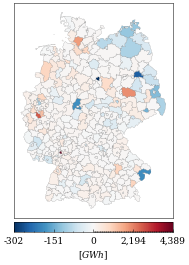

In [172]:
# plot elec delta abs
year1=2020
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2])


df_plot = ((df_2-df_1))

#((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=14
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_no_electrolysis_delta_absolut"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='', #Absolute Veränderung des Stromverbauchs\nnach ETW: 2045 vs. 2020
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, edgecolor='dimgrey', linewidth=0.15, license_tag=False, cmap='RdBu_r', delta=True)#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

In [185]:
((df_2/df_1).nlargest(30)).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Wittenberg                                 3.046561
Steinburg                                  2.667560
Kelheim                                    2.229114
Speyer, Kreisfreie Stadt                   1.961990
Rheinisch-Bergischer Kreis                 1.927796
Oldenburg, Landkreis                       1.890480
Tirschenreuth                              1.771627
Friesland (DE)                             1.766102
Oberspreewald-Lausitz                      1.753775
Börde                                      1.660231
Ludwigshafen am Rhein, Kreisfreie Stadt    1.647058
Nienburg (Weser)                           1.629528
Holzminden                                 1.565240
Neustadt a. d. Waldnaab                    1.544461
Cloppenburg                                1.518431
Südliche Weinstraße                        1.516063
Pfaffenhofen a. d. Ilm                     1.500336
Herne, Kreisfreie Stadt                    1.490264
Köln, Kreisfreie Stadt                     1.479641
Hersfeld-Rot

In [193]:
((df_2-df_1).nsmallest(10)).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Wolfsburg, Kreisfreie Stadt   -193347.423563
Passau, Landkreis             -128147.193561
Kassel, Landkreis             -117312.927629
Dresden, Kreisfreie Stadt     -114071.583677
Berlin                         -85926.588898
Spree-Neiße                    -81730.769821
Vorpommern-Rügen               -62664.822217
Soest                          -60849.580311
Bottrop, Kreisfreie Stadt      -56565.538516
Bernkastel-Wittlich            -55329.830590
dtype: float64

In [195]:
regions='Passau, Landkreis'
(df_ind_elec.groupby(axis=1, level=0).sum().rename(index=config.dict_region_code(keys='ags_lk', values='name')).rename(columns=config.dict_wz())
 .loc[regions].T.sort_values(ascending=False))#.sum().nlargest(10)

WZ
Nahrungsindustrie           133231.379687
Metallerzeugnisse           114688.178385
Fahrzeugbau                 112443.673313
Gummi & Kunststoffe         106049.117726
Glas & Keramik              101512.476831
Holzverarbeitung             81928.258188
Maschinenbau                 65034.805525
Elektrische Ausrüst.         57214.383698
Steine & Erden               29987.142685
Getränkeherstellung          17191.331949
Chemieindustrie              15867.130534
Bekleidung                   11379.944300
Elektronik & IT               8207.683245
Reparatur Maschinen+Anl.      7366.818140
Pharmazeut. Industrie         4662.266788
Textilien                     4554.217605
Medien                        2681.643466
Herstellung Sonstiges         2527.644496
Möbeln                        2461.046895
Lederwaren & Schuhe            466.740952
Sonstiger Fahrzeugbau           46.380432
Kohlenbergbau                    0.000000
Metallerzeugung                  0.000000
Öl & Gas                       

<AxesSubplot:>

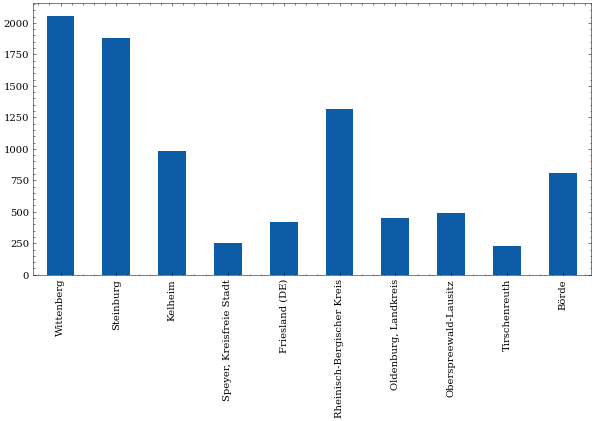

In [188]:
# Landkreise mit höchstem Zuwachs an Stromverbräuchen insgesamt zwischen 2045 und 2020

year1=2025
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2])
idx = ((df_2/df_1).nlargest(10)).index
(df_plot.loc[idx]/1000).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

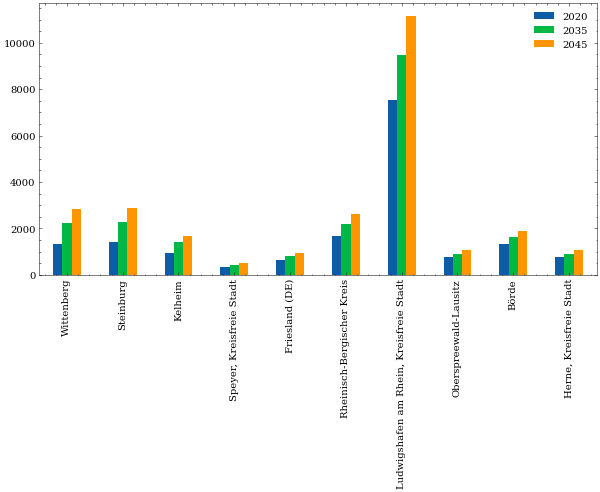

In [319]:
# Landkreise mit höchstem Zuwachs an Stromverbräuchen insgesamt zwischen 2045 und 2020

year1=2025
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2])
idx = ((df_2/df_1).nlargest(10)).index
(df_plot.loc[idx]/1000).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

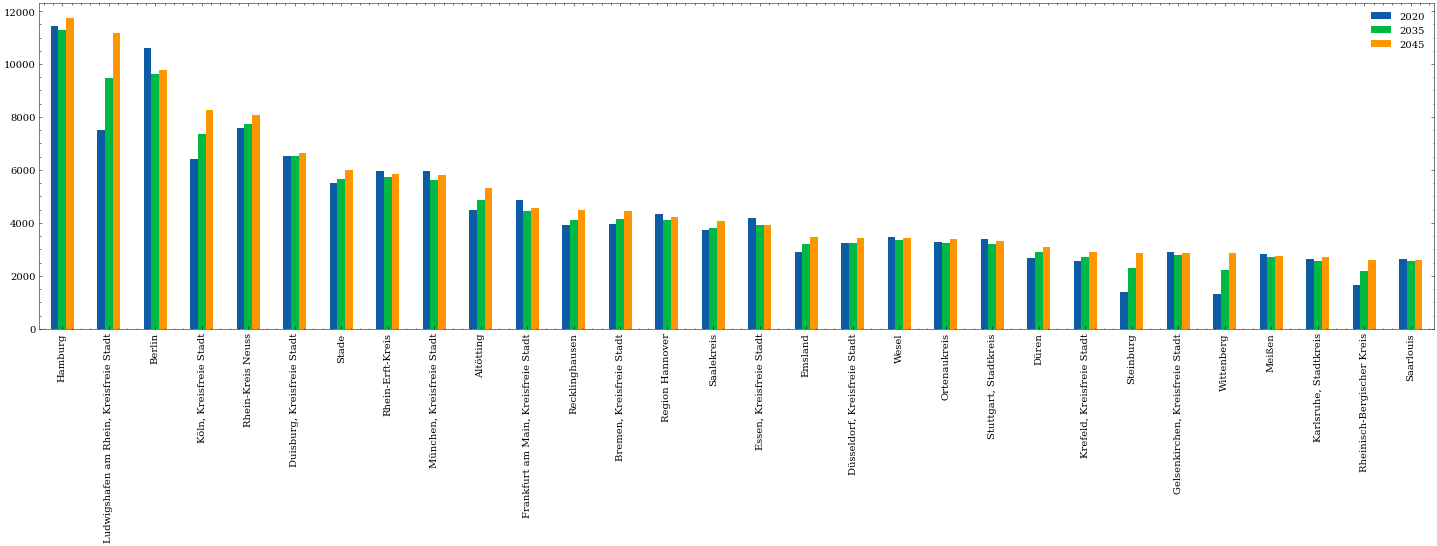

In [309]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(25,6))

In [91]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).plot(kind='bar', figsize=(25,6))

IndexError: index 2045 is out of bounds for axis 0 with size 401

#### Strom mit elektrolyse

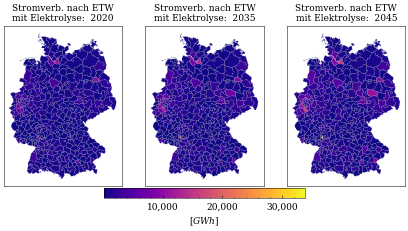

In [93]:
# plot elec abs mit elektrolyse
years=[2020, 2035, 2045]
df_plot = (df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]).add(df_app_gas_rep_hydro_app_elektrolysers[years])
# df_plot = df_plot.nlargest(10, columns=2045)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_with_electrolysis"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Stromverb. nach ETW\nmit Elektrolyse: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='plasma')#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

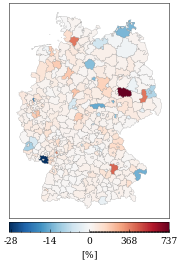

In [173]:
# plot elec delata relativ mit elektrolyse
year1=2020
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1]).add(df_app_gas_rep_hydro_app_elektrolysers[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2]).add(df_app_gas_rep_hydro_app_elektrolysers[year2])

df_plot = ((df_2-df_1)/df_1)*100

#((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=14
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_with_electrolysis_delta_relativ"


fig, ax = plot.choropleth_map(df_plot, relative=False, unit='%', axtitle='', #Relative Veränderung des Stromverbauchs\nnach ETW mit Elektrolyse: 2045 vs. 2020
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, edgecolor='dimgrey', linewidth=0.15, license_tag=False, cmap='RdBu_r', delta=True)#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

In [95]:
df_plot.nlargest(10).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Wittenberg                                 737.834244
Kelheim                                    431.586987
Oberspreewald-Lausitz                      392.357505
Steinburg                                  388.952868
Ludwigshafen am Rhein, Kreisfreie Stadt    343.995243
Speyer, Kreisfreie Stadt                   233.508076
Rheinisch-Bergischer Kreis                 210.539538
Holzminden                                 208.305465
Nienburg (Weser)                           200.079674
Oldenburg, Landkreis                       184.563493
dtype: float64

In [96]:
df_plot.nsmallest(10).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Südwestpfalz                      -28.507876
Bottrop, Kreisfreie Stadt         -19.473762
Kyffhäuserkreis                   -14.502761
Passau, Landkreis                 -13.742282
Vorpommern-Rügen                  -13.040142
Halle (Saale), Kreisfreie Stadt   -12.790307
Wolfsburg, Kreisfreie Stadt       -12.580895
Uelzen                            -12.064164
Gera, Kreisfreie Stadt            -11.924641
Trier-Saarburg                     -9.387323
dtype: float64

In [97]:
from disaggregator import data
regions = ['Oberspreewald-Lausitz']
(data.employees_per_branch(region_code='name', year=2020)[regions]).nlargest(20, columns=regions).rename(index=config.dict_wz()) # .sum()/1000#

region_code,Oberspreewald-Lausitz
WZ,
Vorb. Baustellenarbeiten,2637.105090
Einzelhandel,2389.856598
Öff. Verwaltung,2126.333348
Sozialwesen(oh.Heime),2046.820958
Gesundheitswesen,1871.804203
Fahrzeugbau,1318.417723
Lagerei,1141.984331
Garten-u.Landschaftsbau; Gebäudebetreuung,1070.227461
Heime (oh.Erholungs- u.Ferienheime),1059.726456


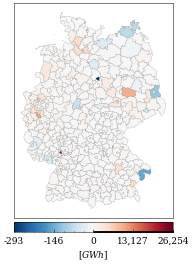

In [174]:
# plot elec delta absolut mit elektrolyse
year1=2020
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1]).add(df_app_gas_rep_hydro_app_elektrolysers[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2]).add(df_app_gas_rep_hydro_app_elektrolysers[year2])

df_plot = ((df_2-df_1))

#((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=14
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_with_electrolysis_delta_absolut"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='', #Relative Veränderung des Stromverbauchs\nnach ETW mit Elektrolyse: 2045 vs. 2020
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, edgecolor='dimgrey', linewidth=0.15, license_tag=False, cmap='RdBu_r', delta=True)#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

In [99]:
df_plot.nlargest(10).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))/1000000

Ludwigshafen am Rhein, Kreisfreie Stadt    26.254781
Köln, Kreisfreie Stadt                     10.645097
Wittenberg                                  9.599228
Altötting                                   5.118529
Hamburg                                     4.967961
Steinburg                                   4.855920
Stade                                       4.120883
Kelheim                                     3.962918
Rhein-Kreis Neuss                           3.510851
Recklinghausen                              3.350342
dtype: float64

In [ ]:
# Landkreise mit höchstem Zuwachs an Stromverbräuchen insgesamt zwischen 2045 und 2020

year1=2025
year2=2045
df_1 = (df_elec_before_switch[year1]).add(df_app_elc_on_top_app_state_ind[year1]).add(df_app_elc_on_top_app_state_cts[year1])
df_2 = (df_elec_before_switch[year2]).add(df_app_elc_on_top_app_state_ind[year2]).add(df_app_elc_on_top_app_state_cts[year2])
idx = ((df_2/df_1).nlargest(10)).index
(df_plot.loc[idx]/1000).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

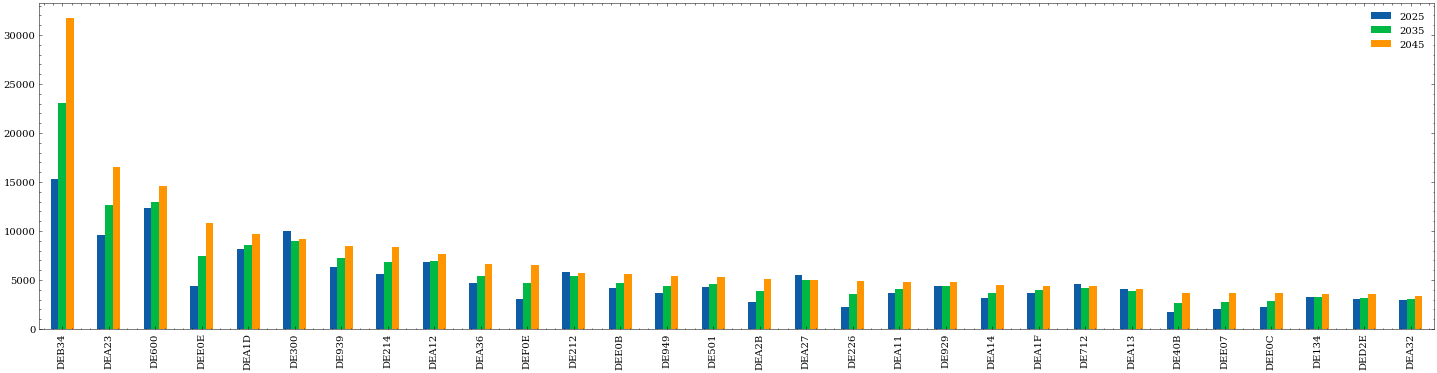

In [69]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).rename(config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(25,6))

#### Wasserstoff

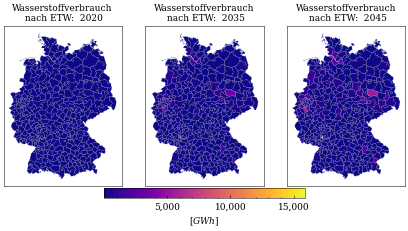

In [100]:
# plothydro
years=[2020, 2035, 2045]
df_plot = (df_app_gas_rep_hydro_app_hydro[years])
#df_plot = df_plot.drop(df_plot.nlargest(1, columns=2045).index)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_hydro_after_switch_years"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Wasserstoffverbrauch\n nach ETW: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='plasma') #, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

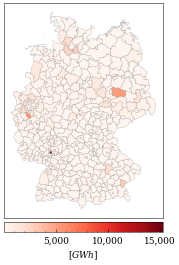

In [175]:
# plot elec rel

year1=2020
year2=2045
df_1 = (df_app_gas_rep_hydro_app_hydro[year1])
df_2 = (df_app_gas_rep_hydro_app_hydro[year2])

df_plot = ((df_2-df_1))/1000

#((df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]))#.nsmallest(392,columns=2020)
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=14
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_hydro_after_switch_years_delta_absolut"


fig, ax = plot.choropleth_map(df_plot, relative=False, unit='GWh', axtitle='', #Absolute Veränderung des\nWasserstoffverbrauchs: 2045 vs. 2020
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, edgecolor='dimgrey', linewidth=0.15, license_tag=False, cmap='Reds', delta=False)#, cmap='YlGnBu'

plt.savefig(path_plots+str(fig_name)+'.svg')

In [399]:
df_app_gas_rep_hydro_app_hydro.sum(axis=0)/1000000

Jahre
2020      4.246987
2025     25.379845
2030     46.356737
2035     67.707190
2040     89.486782
2045    111.175485
dtype: float64

In [102]:
df_plot.nlargest(15).rename(index=config.dict_region_code(keys='natcode_nuts3', values='name'))

Ludwigshafen am Rhein, Kreisfreie Stadt    15305.550348
Köln, Kreisfreie Stadt                      5555.951586
Wittenberg                                  5281.054981
Altötting                                   2889.485584
Hamburg                                     2814.584323
Stade                                       2354.956918
Kelheim                                     2085.774434
Steinburg                                   2085.119985
Rhein-Kreis Neuss                           1974.126433
Oberspreewald-Lausitz                       1721.557340
Recklinghausen                              1718.930345
Saalekreis                                  1539.408586
Duisburg, Kreisfreie Stadt                  1511.247369
Krefeld, Kreisfreie Stadt                   1402.160968
Rheinisch-Bergischer Kreis                  1281.215726
dtype: float64

In [366]:
from disaggregator import data
wz = ['Glas & Keramik']
(data.employees_per_branch(region_code='name', year=2045).rename(index=config.dict_wz())).loc[wz[0]].nlargest(20)

2022-07-26 16:56:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


region_code
Mainz, Kreisfreie Stadt        3001.062119
Westerwaldkreis                2904.861282
Wunsiedel i. Fichtelgebirge    2841.885538
Merzig-Wadern                  2502.735997
Kronach                        2302.720819
Schwandorf                     2202.103349
Rottal-Inn                     2059.891449
Meißen                         2021.556553
Kitzingen                      1969.166037
Holzminden                     1950.070195
Berlin                         1928.668439
Mayen-Koblenz                  1884.120069
Recklinghausen                 1883.567749
Börde                          1796.560736
Städteregion Aachen            1548.905223
Region Hannover                1545.192865
Nordsachsen                    1536.837602
Emsland                        1373.765793
Nürnberger Land                1369.493606
Nienburg (Weser)               1361.927704
Name: Glas & Keramik, dtype: float64

In [369]:
from disaggregator import data
regions = ['Steinburg']
(data.employees_per_branch(region_code='name', year=2020)[regions]).nlargest(20, columns=regions).rename(index=config.dict_wz()) # .sum()/1000#

region_code,Steinburg
WZ,
Einzelhandel,2961.346359
Öff. Verwaltung,2423.856778
Vorb. Baustellenarbeiten,2375.009723
Gesundheitswesen,2179.698203
Heime (oh.Erholungs- u.Ferienheime),1869.805816
Sozialwesen(oh.Heime),1858.241419
Maschinenbau,1354.632108
Großhandel,1208.167916
"Interessenvertr.,kirchl. u.sonst.Vereinigungen",1114.323026


### 11 after fuel switch temporal results

In [44]:
df_app_gas_pre_switch_curve_2035_cts.sum()/1000000

NameError: name 'df_app_gas_pre_switch_curve_2035_cts' is not defined

In [254]:
col_slice = pd.IndexSlice

# industry before switch elec
df_app_elc_pre_switch_curve_2020_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2020.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2025_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas no KO
df_app_gas_pre_switch_curve_2020_ind = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2020.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2025_ind = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_ind = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_ind = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas with KO
df_app_gas_pre_switch_curve_2020_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2020_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2025_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2025_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2035_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2045_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas without KO
# df_app_gas_pre_switch_curve_2025_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
# df_app_gas_pre_switch_curve_2035_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
# df_app_gas_pre_switch_curve_2045_ind_KO = pd.read_csv(path + "/17_load_curve_before_switch_gas_industry_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)



In [255]:
# cts before switch elec
df_app_elc_pre_switch_curve_2020_cts = pd.read_csv(path + "/17_load_curve_before_switch_elec_cts_2020.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2025_cts = pd.read_csv(path + "/17_load_curve_before_switch_elec_cts_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_cts = pd.read_csv(path + "/17_load_curve_before_switch_elec_cts_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_cts = pd.read_csv(path + "/17_load_curve_before_switch_elec_cts_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# cts before switch gas
df_app_gas_pre_switch_curve_2020_cts = pd.read_csv(path + "/17_load_curve_before_switch_gas_cts_2020.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2025_cts = pd.read_csv(path + "/17_load_curve_before_switch_gas_cts_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_cts = pd.read_csv(path + "/17_load_curve_before_switch_gas_cts_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_cts = pd.read_csv(path + "/17_load_curve_before_switch_gas_cts_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry power on top
df_app_elc_on_top_curve_2020_ind = pd.read_csv(path + "/14_results_elec_from_switch_industry_load_curve_2020.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2025_ind = pd.read_csv(path + "/14_results_elec_from_switch_industry_load_curve_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2035_ind = pd.read_csv(path + "/14_results_elec_from_switch_industry_load_curve_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2045_ind = pd.read_csv(path + "/14_results_elec_from_switch_industry_load_curve_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by electrification with KO
df_app_gas_replaced_curve_2020_ind_KO = pd.read_csv(path + "/14_results_gas_to_switch_industry_gas_curve_2020.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_curve_2025_ind_KO = pd.read_csv(path + "/14_results_gas_to_switch_industry_gas_curve_2025.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_curve_2035_ind_KO = pd.read_csv(path + "/14_results_gas_to_switch_industry_gas_curve_2035.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_curve_2045_ind_KO = pd.read_csv(path + "/14_results_gas_to_switch_industry_gas_curve_2045.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)

In [256]:
# industry gas replaced by hydrogen
df_app_gas_replaced_by_hydro_curve_2020_ind = pd.read_csv(path + "/18_results_gas_to_hydro_industry_curve_2020.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2025_ind = pd.read_csv(path + "/18_results_gas_to_hydro_industry_curve_2025.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2035_ind = pd.read_csv(path + "/18_results_gas_to_hydro_industry_curve_2035.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2045_ind = pd.read_csv(path + "/18_results_gas_to_hydro_industry_curve_2045.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)


In [257]:

# cts power on top
df_app_elc_on_top_curve_2020_cts = pd.read_csv(path + "/14_results_elec_from_switch_cts_load_curve_2020.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_elc_on_top_curve_2025_cts = pd.read_csv(path + "/14_results_elec_from_switch_cts_load_curve_2025.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_elc_on_top_curve_2035_cts = pd.read_csv(path + "/14_results_elec_from_switch_cts_load_curve_2035.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_elc_on_top_curve_2045_cts = pd.read_csv(path + "/14_results_elec_from_switch_cts_load_curve_2045.csv", header=[0], index_col=[0]).dropna(axis=1).sum(axis=1)

In [258]:
df_app_gas_replaced_curve_2020_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2020_new_simple.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [259]:
df_app_gas_replaced_curve_2025_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2025_new_simple.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [260]:
df_app_gas_replaced_curve_2035_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2035_new_simple.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [261]:


# cts gas replaced
# df_app_gas_replaced_curve_2025_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2025.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
# df_app_gas_replaced_curve_2035_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2035.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
# df_app_gas_replaced_curve_2045_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2045.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)

# cts gas replaced simple
df_app_gas_replaced_curve_2045_cts = pd.read_csv(path + "/14_results_gas_to_switch_cts_gas_curve_2045_new_simple.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [262]:

# industry hydrogen on top
df_app_hydro_curve_2020_ind = pd.read_csv(path + "/18_results_hydro_industry_curve_2020.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2025_ind = pd.read_csv(path + "/18_results_hydro_industry_curve_2025.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2035_ind = pd.read_csv(path + "/18_results_hydro_industry_curve_2035.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2045_ind = pd.read_csv(path + "/18_results_hydro_industry_curve_2045.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [263]:
df_gesamt_no_switch = pd.read_csv(path + "/02_results_Bundesebene_2020_2050.csv", header=[0,1], index_col=[0])
df_gesamt_no_switch.loc[[2020, 2035, 2045]]/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2020           149.648863  120.266127  226.204844  312.368033
2035           121.626103   90.125221  205.388291  290.209512
2045           115.919427   84.009534  200.881484  285.273931

In [264]:
df_app_gas_pre_switch_curve_2020_ind_KO.sum().sum()/1000000

312.3680330808573

In [265]:
df_plot = pd.DataFrame()

df_plot[2020] = (df_app_elc_on_top_curve_2025_ind)
df_plot[2035] = ( df_app_elc_on_top_curve_2035_ind).values.tolist()
df_plot[2045] = ( df_app_elc_on_top_curve_2045_ind).values.tolist()
df_plot.sum()

2020    2.094649e+07
2035    5.106003e+07
2045    8.008747e+07
dtype: float64

##### elec industry

In [280]:
# industrie strom 2020, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/2.1

df_plot_1 = pd.DataFrame()
df_plot_2 = pd.DataFrame()

df_app_elc_pre_switch_curve_2020_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2020_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2020_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2020_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_plot_1[2020] = (df_app_elc_pre_switch_curve_2020_ind + df_app_elc_on_top_curve_2020_ind).resample('H').sum()/1000
df_plot_1.index = pd.to_datetime(df_plot_1.index)

mask = ((df_plot_1.index >= "2020-02-29") & (df_plot_1.index < "2020-03-01"))
df_plot_1 = df_plot_1.loc[~mask]

df_plot_1[2045] = ((df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind).resample('H').sum()/1000).values.tolist()
df_ind_elec_ohne_elektrolyse = df_plot_1.copy()
#df_plot_2.index = pd.to_datetime(df_plot_2.index)

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


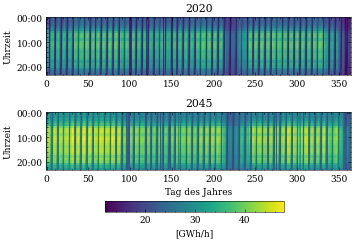

In [266]:


plot.heatmap_timeseries(df_plot_1, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_elec_2020_2045.svg')

In [267]:
df_plot_1.loc[df_plot_1.idxmax()]

,2020,2045
2020-03-24 11:00:00,40.368384,43.749299
2020-02-14 11:00:00,36.053536,47.921711


Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


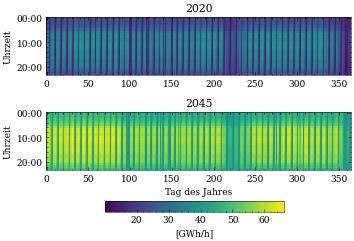

In [268]:
# industrie strom mit elektrolyse 2020, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/2.1

df_plot_1 = pd.DataFrame()
df_plot_2 = pd.DataFrame()

df_app_elc_pre_switch_curve_2020_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2020_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2020_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2020_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_app_hydro_curve_2020_ind.index = pd.to_datetime(df_app_hydro_curve_2020_ind.index)
df_app_hydro_curve_2045_ind.index = pd.to_datetime(df_app_hydro_curve_2045_ind.index)

df_app_elec_for_hydro_curve_2020_ind = df_app_hydro_curve_2020_ind/0.7
df_app_elec_for_hydro_curve_2045_ind = df_app_hydro_curve_2045_ind/0.7

df_plot_1[2020] = (df_app_elc_pre_switch_curve_2020_ind + df_app_elc_on_top_curve_2020_ind + df_app_elec_for_hydro_curve_2020_ind).resample('H').sum()/1000
df_plot_1.index = pd.to_datetime(df_plot_1.index)

mask = ((df_plot_1.index >= "2020-02-29") & (df_plot_1.index < "2020-03-01"))
df_plot_1 = df_plot_1.loc[~mask]

df_plot_1[2045] = ((df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind + df_app_elec_for_hydro_curve_2045_ind).resample('H').sum()/1000).values.tolist()
#df_plot_2.index = pd.to_datetime(df_plot_2.index)
df_ind_elec_mit_elektrolyse = df_plot_1.copy()

plot.heatmap_timeseries(df_plot_1, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_elec_with_hydro_2020_2045.svg')

In [269]:
df_plot_1.loc[df_plot_1.idxmax()]

,2020,2045
2020-03-24 11:00:00,41.063558,61.952977
2020-02-14 11:00:00,36.748711,66.125390


In [285]:
# industrie strom 2020, 2045 ohne, 2045 mit elektrolyse
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.52

df_plot_1 = pd.DataFrame()

df_app_elc_pre_switch_curve_2020_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2020_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2020_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2020_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_app_hydro_curve_2045_ind.index = pd.to_datetime(df_app_hydro_curve_2045_ind.index)
df_app_elec_for_hydro_curve_2045_ind = df_app_hydro_curve_2045_ind/0.7


df_plot_1['2020'] = (df_app_elc_pre_switch_curve_2020_ind + df_app_elc_on_top_curve_2020_ind).resample('H').sum()/1000
df_plot_1.index = pd.to_datetime(df_plot_1.index)

mask = ((df_plot_1.index >= "2020-02-29") & (df_plot_1.index < "2020-03-01"))
df_plot_1 = df_plot_1.loc[~mask]

df_plot_1['2045 ohne Elektrolyse'] = ((df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind).resample('H').sum()/1000).values.tolist()

df_plot_1['2045 mit Elektrolyse'] = ((df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind+df_app_elec_for_hydro_curve_2045_ind).resample('H').sum()/1000).values.tolist()
#df_plot_2.index = pd.to_datetime(df_plot_2.index)



Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


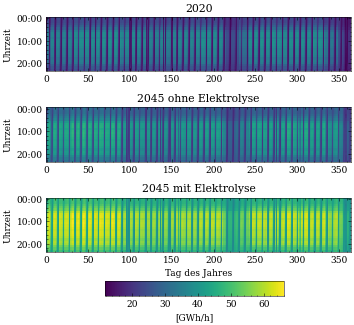

In [294]:
plot.heatmap_timeseries(df_plot_1, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_elec_mit_und_ohne_elektrolyse_2020_2045.svg')

In [290]:
(df_app_elec_for_hydro_curve_2045_ind.resample('H').sum()/1000).mean()

18.129863910222447

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


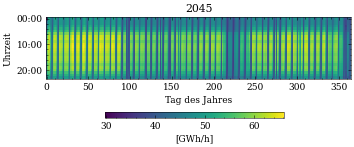

In [147]:
# industrie strom mit elektrolyse 2020, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/3.7

df_plot_1 = pd.DataFrame()
df_plot_2 = pd.DataFrame()

df_app_elc_pre_switch_curve_2020_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2020_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2020_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2020_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_app_hydro_curve_2020_ind.index = pd.to_datetime(df_app_hydro_curve_2020_ind.index)
df_app_hydro_curve_2045_ind.index = pd.to_datetime(df_app_hydro_curve_2045_ind.index)

df_app_elec_for_hydro_curve_2020_ind = df_app_hydro_curve_2020_ind/0.7
df_app_elec_for_hydro_curve_2045_ind = df_app_hydro_curve_2045_ind/0.7

#df_plot_1[2020] = (df_app_elc_pre_switch_curve_2020_ind + df_app_elc_on_top_curve_2020_ind + df_app_elec_for_hydro_curve_2020_ind).resample('H').sum()/1000
df_plot_1.index = pd.to_datetime(df_plot_1.index)

mask = ((df_plot_1.index >= "2020-02-29") & (df_plot_1.index < "2020-03-01"))
df_plot_1 = df_plot_1.loc[~mask]

df_plot_1[2045] = ((df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind + df_app_elec_for_hydro_curve_2045_ind).resample('H').sum()/1000).values.tolist()
#df_plot_2.index = pd.to_datetime(df_plot_2.index)

plot.heatmap_timeseries(df_plot_1, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_elec_with_hydro_2045.svg')

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:403: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


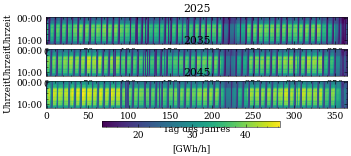

In [148]:
# industrie strom 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_elc_pre_switch_curve_2025_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2025_ind.index)
df_app_elc_pre_switch_curve_2035_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2035_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2025_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2025_ind.index)
df_app_elc_on_top_curve_2035_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2035_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_plot[2025] = (df_app_elc_pre_switch_curve_2025_ind + df_app_elc_on_top_curve_2025_ind)
df_plot[2035] = (df_app_elc_pre_switch_curve_2035_ind + df_app_elc_on_top_curve_2035_ind).values.tolist()
df_plot[2045] = (df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_elec.svg')

##### gas industry

In [297]:
# industry gas 2020, 2030, 2040, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.16

df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2020_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2020_ind_KO.index)
df_app_gas_pre_switch_curve_2025_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_ind_KO.index)
df_app_gas_pre_switch_curve_2035_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_ind_KO.index)
df_app_gas_pre_switch_curve_2045_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_ind_KO.index)

df_app_gas_replaced_curve_2020_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2020_ind_KO.index)
df_app_gas_replaced_curve_2025_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2025_ind_KO.index)
df_app_gas_replaced_curve_2035_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2035_ind_KO.index)
df_app_gas_replaced_curve_2045_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2045_ind_KO.index)

df_app_gas_replaced_by_hydro_curve_2020_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2020_ind.index)
df_app_gas_replaced_by_hydro_curve_2025_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2025_ind.index)
df_app_gas_replaced_by_hydro_curve_2035_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2035_ind.index)
df_app_gas_replaced_by_hydro_curve_2045_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2045_ind.index)

df_plot[2020] = (df_app_gas_pre_switch_curve_2020_ind_KO - df_app_gas_replaced_curve_2020_ind_KO - df_app_gas_replaced_by_hydro_curve_2020_ind).resample('H').sum()/1000

df_plot.index = pd.to_datetime(df_plot.index)
mask = ((df_plot.index >= "2020-02-29") & (df_plot.index < "2020-03-01"))
df_plot = df_plot.loc[~mask]

df_plot[2025] = ((df_app_gas_pre_switch_curve_2025_ind_KO - df_app_gas_replaced_curve_2025_ind_KO - df_app_gas_replaced_by_hydro_curve_2025_ind).resample('H').sum()/1000).values.tolist()
df_plot[2035] = ((df_app_gas_pre_switch_curve_2035_ind_KO - df_app_gas_replaced_curve_2035_ind_KO - df_app_gas_replaced_by_hydro_curve_2035_ind).resample('H').sum()/1000).values.tolist()
df_plot[2045] = ((df_app_gas_pre_switch_curve_2045_ind_KO - df_app_gas_replaced_curve_2045_ind_KO - df_app_gas_replaced_by_hydro_curve_2045_ind).resample('H').sum()/1000).clip(0).values.tolist()

df_gas_ind_total = df_plot.copy()


In [ ]:

plot.heatmap_timeseries(df_plot, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_gas_2020_bis_2045.svg')

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


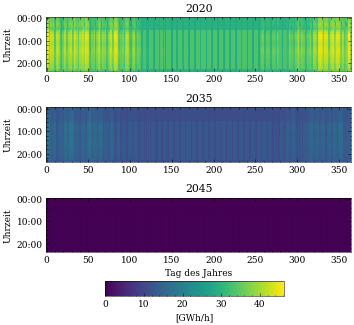

In [149]:
# industry gas 2020, 2035, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.52

df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2020_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2020_ind_KO.index)
df_app_gas_pre_switch_curve_2035_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_ind_KO.index)
df_app_gas_pre_switch_curve_2045_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_ind_KO.index)

df_app_gas_replaced_curve_2020_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2020_ind_KO.index)
df_app_gas_replaced_curve_2035_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2035_ind_KO.index)
df_app_gas_replaced_curve_2045_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2045_ind_KO.index)

df_app_gas_replaced_by_hydro_curve_2020_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2020_ind.index)
df_app_gas_replaced_by_hydro_curve_2035_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2035_ind.index)
df_app_gas_replaced_by_hydro_curve_2045_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2045_ind.index)

df_plot[2020] = (df_app_gas_pre_switch_curve_2020_ind_KO - df_app_gas_replaced_curve_2020_ind_KO - df_app_gas_replaced_by_hydro_curve_2020_ind).resample('H').sum()/1000

df_plot.index = pd.to_datetime(df_plot.index)
mask = ((df_plot.index >= "2020-02-29") & (df_plot.index < "2020-03-01"))
df_plot = df_plot.loc[~mask]

df_plot[2035] = ((df_app_gas_pre_switch_curve_2035_ind_KO - df_app_gas_replaced_curve_2035_ind_KO - df_app_gas_replaced_by_hydro_curve_2035_ind).resample('H').sum()/1000).values.tolist()
df_plot[2045] = ((df_app_gas_pre_switch_curve_2045_ind_KO - df_app_gas_replaced_curve_2045_ind_KO - df_app_gas_replaced_by_hydro_curve_2045_ind).resample('H').sum()/1000).clip(0).values.tolist()

plot.heatmap_timeseries(df_plot, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_gas_2020_2045.svg')

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


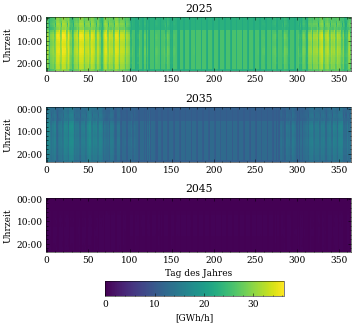

In [150]:
# industry gas 2025, 2035, 2045

df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2025_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_ind_KO.index)
df_app_gas_pre_switch_curve_2035_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_ind_KO.index)
df_app_gas_pre_switch_curve_2045_ind_KO.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_ind_KO.index)

df_app_gas_replaced_curve_2025_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2025_ind_KO.index)
df_app_gas_replaced_curve_2035_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2035_ind_KO.index)
df_app_gas_replaced_curve_2045_ind_KO.index = pd.to_datetime(df_app_gas_replaced_curve_2045_ind_KO.index)

df_app_gas_replaced_by_hydro_curve_2025_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2025_ind.index)
df_app_gas_replaced_by_hydro_curve_2035_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2035_ind.index)
df_app_gas_replaced_by_hydro_curve_2045_ind.index = pd.to_datetime(df_app_gas_replaced_by_hydro_curve_2045_ind.index)

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_ind_KO - df_app_gas_replaced_curve_2025_ind_KO - df_app_gas_replaced_by_hydro_curve_2025_ind)
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_ind_KO - df_app_gas_replaced_curve_2035_ind_KO - df_app_gas_replaced_by_hydro_curve_2035_ind).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_ind_KO - df_app_gas_replaced_curve_2045_ind_KO - df_app_gas_replaced_by_hydro_curve_2045_ind).clip(0).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_gas.svg')

##### Wasserstoff

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


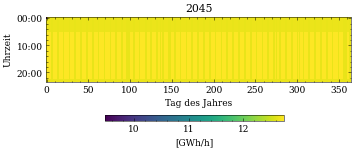

In [270]:
# industrie strom mit elektrolyse 2020, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/3.6

df_plot_1 = pd.DataFrame()

df_app_hydro_curve_2045_ind.index = pd.to_datetime(df_app_hydro_curve_2045_ind.index)


df_plot_1[2045] = (df_app_hydro_curve_2045_ind).resample('H').sum()/1000


plot.heatmap_timeseries(df_plot_1, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_industry_hydro_2045.svg')

In [293]:
(((df_app_hydro_curve_2045_ind).resample('H').sum()/1000)/0.7).mean()

18.129863910222447

In [272]:
df_plot_1.loc[df_plot_1.idxmax()]

,2045
2045-01-02 06:00:00,12.742575


In [273]:
df_plot_1.loc[df_plot_1.idxmin()]

,2045
2045-01-01,9.477648


<AxesSubplot:>

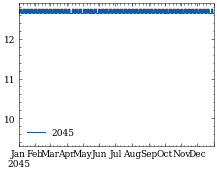

In [153]:
df_plot_1.plot()

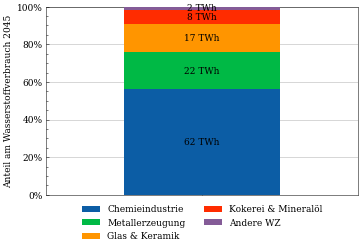

In [154]:
df_hydro_wz = pd.read_csv(path + "/18_results_gas_replaced_hydro_industry_wz_years.csv", header=[0,1], index_col=[0])#.dropna().sum(axis=1)
df_hydro_2045_wz = (df_hydro_wz['2045']['Wasserstoff']/1000000).to_frame()
df_hydro_2045_wz = df_hydro_2045_wz.assign(Anteil = lambda x: x.div(df_hydro_2045_wz.sum())*100)

df_plot_h2_wz = df_hydro_2045_wz.sort_values(by='Anteil', ascending=False)#.nlargest(6, 'Anteil')#['Anteil']#.plot(kind='bar', stacked=True)
df_plot_h2_wz_rest = df_plot_h2_wz.iloc[4:].sum()#.to_frame()
df_plot_h2_wz_plot = df_plot_h2_wz.nlargest(4, 'Anteil')
df_plot_h2_wz_plot.loc['Andere WZ']=df_plot_h2_wz_rest
df_plot_h2_wz_plot.rename(index=config.dict_wz(), inplace=True)

w_cm=14
w_in=w_cm/2.5
zorder_b=3
zorder_g=0
f=1
loc = 'upper center'
coords = [0.5, -.01]
ncol=2
fs=9

fig, ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f)))) 
plt.rcParams.update({'font.size':fs})
pd.DataFrame(df_plot_h2_wz_plot['Anteil']).T.plot(ax=ax, kind='bar', zorder=3, stacked=True)

ax.set_ylim(0, 100)
ax.set_ylabel('Anteil am Wasserstoffverbrauch 2045')
ax.set_xlabel(None)
ax.tick_params(axis='both', which='both', top=False, right=False)
ax.set_xticklabels('')#labels=ax.get_xticklabels(), rotation=45, ha='right', fontsize = fs)
ax.grid(zorder=0)
rects = ax.patches
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Make some labels.
#labels = ["{:.0%}".format(p) for p in df_plot_h2_wz_plot['Wasserstoff'].tolist()]#.round(1)
n=0
labels = ["{0:.{1}f} TWh".format(p, n) for p in df_plot_h2_wz_plot['Wasserstoff'].tolist()]#.round(1)
height_last = 0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, (height/2 + height_last), label, ha="center", va="center", color='k'
    )
    height_last += height
ax.legend(loc=loc, bbox_to_anchor=(coords),ncol=ncol)
plt.savefig(path_plots + '/Hydrogen_WZ_2045_stacked.svg')    
#ax.bar_label(df_plot_h2_wz_plot['Anteil'])

#ax.plot(, kind='bar', stacked=True)
#plt.pie(df_plot_h2_wz_plot['Anteil'])

In [155]:
df_plot_h2_wz_plot.sum()

Wasserstoff    111.175485
Anteil         100.000000
dtype: float64

##### gas cts

In [296]:
# cts gas 2020, 2025, 2035, 2045

w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.16

df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2020_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2020_cts.index)
df_app_gas_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2020_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2020_cts.index)
df_app_gas_replaced_curve_2025_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2025_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2020] = (df_app_gas_pre_switch_curve_2020_cts - df_app_gas_replaced_curve_2020_cts.resample('H').sum())

df_plot.index = pd.to_datetime(df_plot.index)
mask = ((df_plot.index >= "2020-02-29") & (df_plot.index < "2020-03-01"))
df_plot = df_plot.loc[~mask]

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_cts - df_app_gas_replaced_curve_2025_cts.resample('H').sum()).values.tolist()
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).values.tolist()
df_gas_cts_total = df_plot.copy()



In [ ]:
plot.heatmap_timeseries(df_plot/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts_gas_2020_bis_2045.svg')

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


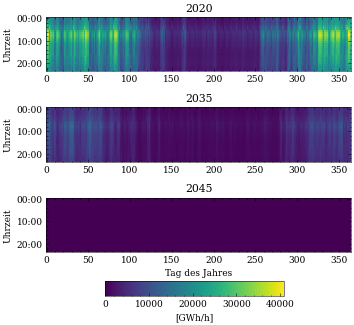

In [157]:
# cts gas 2020, 2035, 2045
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.52

df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2020_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2020_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2020_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2020_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2020] = (df_app_gas_pre_switch_curve_2020_cts - df_app_gas_replaced_curve_2020_cts.resample('H').sum())

df_plot.index = pd.to_datetime(df_plot.index)
mask = ((df_plot.index >= "2020-02-29") & (df_plot.index < "2020-03-01"))
df_plot = df_plot.loc[~mask]

df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).values.tolist()

plot.heatmap_timeseries(df_plot, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts_gas_2020_2045.svg')

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


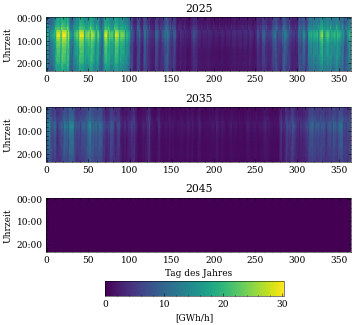

In [158]:
# cts gas 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2025_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2025_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_cts - df_app_gas_replaced_curve_2025_cts.resample('H').sum())
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts_gas.svg')

In [217]:
df_plot.sum()

2025    1.601402e+08
2035    1.489021e+08
2045    1.506107e+08
dtype: float64

In [218]:
df_plot[2025] = (df_app_elc_pre_switch_curve_2025_cts )
df_plot[2035] = (df_app_elc_pre_switch_curve_2035_cts ).values.tolist()
df_plot[2045] = (df_app_elc_pre_switch_curve_2045_cts ).values.tolist()
df_plot.sum()

2025    1.481188e+08
2035    1.294415e+08
2045    1.233818e+08
dtype: float64

In [219]:
df_plot[2025] = ( df_app_elc_on_top_curve_2025_cts)
df_plot[2035] = ( df_app_elc_on_top_curve_2035_cts).values.tolist()
df_plot[2045] = ( df_app_elc_on_top_curve_2045_cts).values.tolist()
df_plot.sum()

2025    1.202141e+07
2035    1.946060e+07
2045    2.722884e+07
dtype: float64

##### elec cts

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


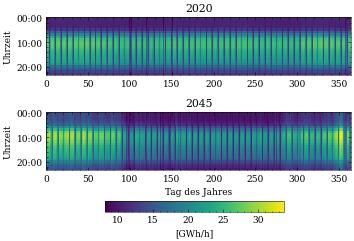

In [274]:
# cts strom 2020, 2035, 2045
df_plot = pd.DataFrame()
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/2.1

df_app_elc_pre_switch_curve_2020_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2020_cts.index)
df_app_elc_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_cts.index)

df_app_elc_on_top_curve_2020_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2020_cts.index)
df_app_elc_on_top_curve_2045_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2045_cts.index)

df_plot[2020] = (df_app_elc_pre_switch_curve_2020_cts + df_app_elc_on_top_curve_2020_cts).resample('H').sum()/1000

df_plot.index = pd.to_datetime(df_plot.index)
mask = ((df_plot.index >= "2020-02-29") & (df_plot.index < "2020-03-01"))
df_plot = df_plot.loc[~mask]

df_plot[2045] = ((df_app_elc_pre_switch_curve_2045_cts + df_app_elc_on_top_curve_2045_cts).resample('H').sum()/1000).values.tolist()

df_cts_elec = df_plot.copy()

plot.heatmap_timeseries(df_plot, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts_elec_2020_2045.svg')

In [275]:
df_plot.loc[df_plot.idxmax()]

,2020,2045
2020-01-15 11:00:00,27.623315,16.874689
2020-12-19 09:00:00,19.801030,33.663926


Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


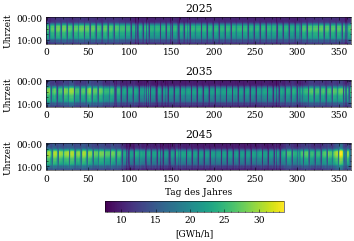

In [161]:
# cts strom 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_elc_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2025_cts.index)
df_app_elc_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2035_cts.index)
df_app_elc_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_cts.index)

df_app_elc_on_top_curve_2025_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2025_cts.index)
df_app_elc_on_top_curve_2035_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2035_cts.index)
df_app_elc_on_top_curve_2045_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2045_cts.index)

df_plot[2025] = (df_app_elc_pre_switch_curve_2025_cts + df_app_elc_on_top_curve_2025_cts)
df_plot[2035] = (df_app_elc_pre_switch_curve_2035_cts + df_app_elc_on_top_curve_2035_cts).values.tolist()
df_plot[2045] = (df_app_elc_pre_switch_curve_2045_cts + df_app_elc_on_top_curve_2045_cts).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts_elec.svg')

##### elec total

In [281]:
#cts
df_plot

,2020,2045
2020-01-01 00:00:00,8.978717,14.444743
2020-01-01 01:00:00,8.882401,14.614923
2020-01-01 02:00:00,8.670728,14.248082
2020-01-01 03:00:00,8.575091,14.528083
2020-01-01 04:00:00,8.800146,15.361134
...,...,...
2020-12-31 19:00:00,20.580886,15.781268
2020-12-31 20:00:00,17.160790,15.301881
2020-12-31 21:00:00,14.650774,14.481413
2020-12-31 22:00:00,12.958444,13.405944


In [282]:
#industry
df_plot_1

,2020,2045
2020-01-01 00:00:00,13.007913,21.793144
2020-01-01 01:00:00,12.992617,21.414970
2020-01-01 02:00:00,12.979011,21.310404
2020-01-01 03:00:00,13.044361,20.088885
2020-01-01 04:00:00,13.374650,20.400844
...,...,...
2020-12-31 19:00:00,18.194684,22.346059
2020-12-31 20:00:00,17.870036,22.627672
2020-12-31 21:00:00,17.263060,22.829911
2020-12-31 22:00:00,16.830486,23.304234


Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


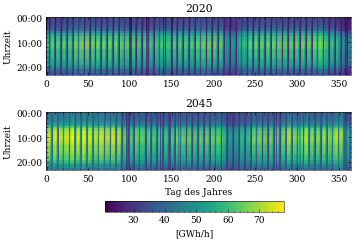

In [170]:
# gesamt
df_plot_total = df_plot.add(df_plot_1)
plot.heatmap_timeseries(df_plot_total, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts+industry_elec_2020_2045.svg')

In [283]:
df_plot_total = df_plot.add(df_plot_1)

df_plot_total.loc[df_plot_total.idxmax()]

,2020,2045
2020-11-25 11:00:00,67.010979,44.451623
2020-02-01 10:00:00,41.131360,77.913964


Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


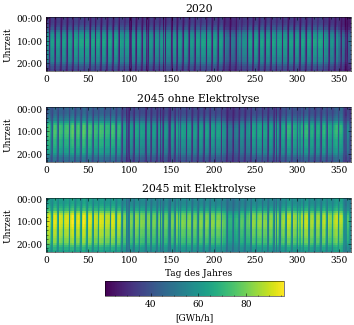

In [172]:
df_total_mit_elektrolyse = pd.DataFrame(dtype= 'float')
df_total_mit_elektrolyse['2020'] = df_cts_elec[2020].add(df_ind_elec_ohne_elektrolyse[2020])
df_total_mit_elektrolyse['2045 ohne Elektrolyse'] = df_cts_elec[2045].add(df_ind_elec_ohne_elektrolyse[2045])
df_total_mit_elektrolyse['2045 mit Elektrolyse'] = df_cts_elec[2045].add(df_ind_elec_mit_elektrolyse[2045])

# plot gesamt
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.52

plot.heatmap_timeseries(df_total_mit_elektrolyse, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts+industry_elec_2020_2045_mit_und_ohne_Elektrolyse.svg')

In [173]:
df_total_mit_elektrolyse.sum()/1000

2020                     380.300249
2045 ohne Elektrolyse    427.172236
2045 mit Elektrolyse     585.984395
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


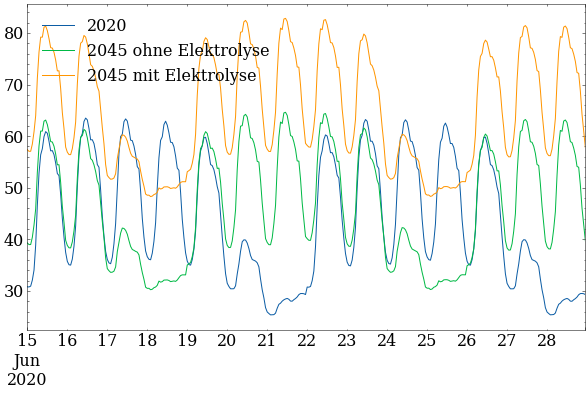

In [174]:
df_total_mit_elektrolyse.loc[(df_total_mit_elektrolyse.index.week.isin([25, 26]))].plot(figsize=(10,6), fontsize=16)
plt.legend(fontsize=16)

In [175]:
df_total_mit_elektrolyse.loc[df_total_mit_elektrolyse.idxmax()]

,2020,2045 ohne Elektrolyse,2045 mit Elektrolyse
2020-11-25 11:00:00,67.010979,44.451623,62.506424
2020-02-01 10:00:00,41.131360,77.913964,96.117642
2020-02-01 10:00:00,41.131360,77.913964,96.117642


In [176]:
t_allo_2020 = data.t_allo(year=2020)
t_allo_2045 = data.t_allo(year=2045)

2022-10-30 20:37:16 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-10-30 20:39:04 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


In [177]:
t_allo_2020.index = pd.to_datetime(t_allo_2020.index)
t_allo_2045.index = pd.to_datetime(t_allo_2045.index)

t_allo_2020_av = t_allo_2020.mean(axis=1).resample('H').bfill()
t_allo_2045_av = t_allo_2045.mean(axis=1).resample('H').bfill()
mask = ((t_allo_2020_av.index >= "2008-02-29") & (t_allo_2020_av.index < "2008-03-01"))
t_allo_2020_av = t_allo_2020_av.loc[~mask]

In [178]:
df_plot_total_short = df_plot_total[:-23]

In [179]:
df_plot_total_short['Temp_2020']=t_allo_2020_av.values.tolist()
df_plot_total_short['Temp_2045']=t_allo_2045_av.values.tolist()

df_plot_total_short.loc[df_plot_total_short.idxmax()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2020,2045,Temp_2020,Temp_2045
2020-11-25 11:00:00,67.010979,44.451623,0.639847,8.535724
2020-02-01 10:00:00,41.131360,77.913964,2.151786,-0.274432
2020-07-27 01:00:00,30.923462,38.947751,23.204561,18.449677
2020-08-19 01:00:00,32.580947,32.782070,17.743402,23.573836


In [180]:
df_plot_total_short.loc[df_plot_total_short.idxmin()]

,2020,2045,Temp_2020,Temp_2045
2020-12-25 03:00:00,21.066725,30.358040,0.750493,1.431393
2020-04-10 02:00:00,23.074164,27.998041,6.951276,15.304570
2020-12-29 01:00:00,26.668049,36.907914,-1.001037,2.441236
2020-12-19 01:00:00,29.395948,45.955745,3.026338,-9.048749


<AxesSubplot:>

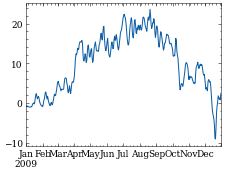

In [183]:
t_allo_2045.mean(axis=1).plot()

<AxesSubplot:>

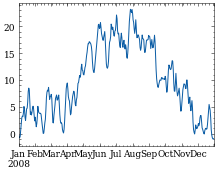

In [184]:
t_allo_2020.mean(axis=1).plot()

##### gas total

In [299]:
df_gas_ind_total

,2020,2025,2035,2045
2020-01-01 00:00:00,36.628932,25.160653,13.586318,0.0
2020-01-01 01:00:00,35.660908,24.567558,13.263111,0.0
2020-01-01 02:00:00,33.730020,23.637563,12.618110,0.0
2020-01-01 03:00:00,31.262743,22.404636,11.817614,0.0
2020-01-01 04:00:00,33.068635,22.965464,12.472211,0.0
...,...,...,...,...
2020-12-31 19:00:00,39.031551,27.705505,13.436777,0.0
2020-12-31 20:00:00,38.163356,27.284033,13.229387,0.0
2020-12-31 21:00:00,36.990326,26.522918,12.865502,0.0
2020-12-31 22:00:00,36.950055,26.469898,12.829527,0.0


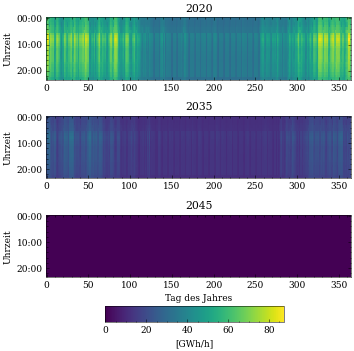

In [302]:
columns = [2020, 2035, 2045]
df_total_gas = (df_gas_cts_total/1000).add(df_gas_ind_total)[columns]

# plot gesamt
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.4

plot.heatmap_timeseries(df_total_gas, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig(path_plots + '/17_load_curves_years_cts+industry_gas_2020_bis_2045.svg')

In [303]:
df_total_gas.loc[df_total_gas.idxmax()]

,2020,2035,2045
2020-12-29 08:00:00,87.227447,20.189014,0.286032
2020-02-01 08:00:00,60.837745,32.903648,0.279664
2020-03-14 15:00:00,46.545518,16.942719,0.315747


## 3. Plots of input data

#### Plot Verbräuche

In [80]:
df_2018 = data.generate_specific_consumption_per_branch(year=2018)
df_gv_sg_2018 =df_2018[5]
df_gv=df_2018[2]
df_gv.loc[33]

df = pd.DataFrame()
df['Restlicher Erdgasverbrauch'] = (df_gv_sg_2018)
df['Erdgas für Stromproduktion'] = (1-df_gv_sg_2018)
df['Erdgasverbrauch 2018'] = df_gv['GV_MWh']/1000000

In [81]:
gas_ind = df.sort_index().iloc[3:32]['Erdgasverbrauch 2018'].sum()

In [82]:
df_plot = df.sort_index().iloc[3:32].nlargest(10, columns='Erdgasverbrauch 2018').rename(index=config.dict_wz())
df_plot['Erdgasverbrauch 2018'].sum()/gas_ind

0.9045938811698881

In [83]:
df_plot#.iloc[:,:2]

,Restlicher Erdgasverbrauch,Erdgas für Stromproduktion,Erdgasverbrauch 2018
Chemieindustrie,0.858509,0.141491,103.908903
Metallerzeugung,0.693673,0.306327,39.556208
Nahrungsindustrie,0.887503,0.112497,32.253044
Glas & Keramik,0.988791,0.011209,29.958519
Papierindustrie,0.715528,0.284472,26.972357
Kokerei & Mineralöl,0.711030,0.288970,24.754050
Fahrzeugbau,0.934656,0.065344,10.197481
Metallerzeugnisse,0.936472,0.063528,10.056520
Maschinenbau,0.932137,0.067863,7.238270
Gummi & Kunststoffe,0.903582,0.096418,7.160343


TypeError: 'NoneType' object is not iterable

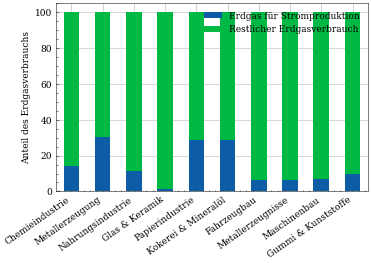

In [84]:
plot_bar(df=df_plot[['Erdgas für Stromproduktion', 'Restlicher Erdgasverbrauch']]*100,
         w_cm=14, ncol=2,loc='upper center', coords=[0.5, -0.4], ylabel='Anteil des Erdgasverbrauchs', rot=35, percentage=True, fig_name=None)
#.plot(kind='bar', stacked=True)


In [99]:
def plot_bar_twinx(df1, df2, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]',ylabel2='Verbrauch [TWh]', xlabel='', stacked=True, ylim=None, ylim2=None, xlim=None,
                   loc=None, ncol=None, coords=None,coords2=None,fs=9, fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax1 = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    ax2 = ax1.twinx()

    
    df1.plot(ax=ax1, kind='bar', stacked=stacked, zorder=3)
    df2.plot(ax=ax2, kind='line', marker="D", linestyle = 'None', markersize=5, linewidth=1.5, zorder=3, c='orange')
       
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    ax1.grid(True, zorder=0)
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.tick_params(axis='both', which='both', top=False, right=False)
    ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=rot, ha='right')
    ax1.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax1.set_title(title)
    
    ax2.set_ylim(ylim2)
    ax2.set_yticks(np.arange(0, 126, 25))
    #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    ax2.set_ylabel(ylabel2)
    ax2.legend(loc=loc, bbox_to_anchor=(coords2), ncol=ncol)
    
    if percentage:
        ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig(path_plots + str(fig_name)+'.svg')
    plt.show()

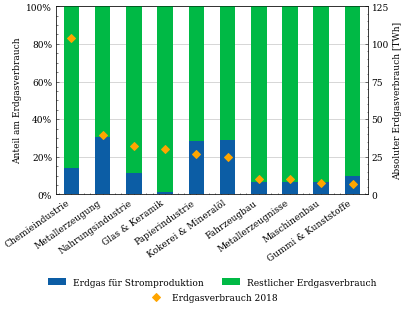

In [101]:
plot_bar_twinx(df1=df_plot[['Erdgas für Stromproduktion', 'Restlicher Erdgasverbrauch']]*100,df2=df_plot[['Erdgasverbrauch 2018']],
               w_cm=14, ncol=2,loc='upper center', coords=[0.5, -0.4], coords2=[0.5, -0.48], ylabel='Anteil am Erdgasverbrauch', 
               ylabel2='Absoluter Erdgasverbrauch [TWh]',ylim=(0,100), ylim2=(0,125),rot=35, percentage=True,
               fig_name='Input_Erdgas_selfgen')
#.plot(kind='bar', stacked=True)


#### plot Beschäftigte

In [170]:
# get number of employees (bze) from database
bze_je_lk_wz = pd.DataFrame(data.employees_per_branch(year=2017))
bze_lk_wz = data.reshape_employees_df(bze_je_lk_wz)
df_plot = bze_lk_wz.sum().to_frame(name='Beschäftigte').drop_duplicates()


In [171]:
new_row=(df_plot.loc['1']+df_plot.loc['2']+df_plot.loc['3'])
new_row.name ='1-3'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['5']+df_plot.loc['6']+df_plot.loc['7-9'])
new_row.name ='5-9'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['17']+df_plot.loc['18'])
new_row.name ='17-18'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['26']+df_plot.loc['27'])
new_row.name ='26-27'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['28']+df_plot.loc['29']+df_plot.loc['30'])
new_row.name ='28-30'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['52']+df_plot.loc['53'])
new_row.name ='52-53'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['45']+df_plot.loc['46']+df_plot.loc['47'])
new_row.name ='45-47'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['50']+df_plot.loc['51'])
new_row.name ='50-51'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['36']+df_plot.loc['37']+df_plot.loc['38-39'])
new_row.name ='36-39'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['41-42']+df_plot.loc['43'])
new_row.name ='41-43'
df_plot=df_plot.append(new_row)

df_plot.drop(index=['1', '2', '3', '5', '6', '7-9', '17', '18', '26', '27', '28', '29', '30', '35', '36', '37', '38-39', '41-42', '43', '45', '46', '47', '50', '51', '52', '53'], inplace=True)
df_plot.sort_index(inplace=True)

In [172]:
values=['Land- u. Forstwirtschaft', 'Nahrungsmittel, u. Tabak', 'Bekleidungsindustrie', 'Holzwaren', 'Papierindustrie u. Druckereien', 'Kokerei- u. Mineralölerzeugnisse',
        'Chemische Industrie', 'Pharmazeutische Industrie', 'Gummi- u. Kunststoffwaren', 'Glasherstellung', 'Metallerzeugung', 'Herst. v. Metallerzeugnissen',
        'Herst. elektr. und opt. Geräte', 'Maschinen u. Fahrzeugbau', 'Hst. v. Möbeln', 'Reparatur Maschinen u. Anl.', 'Wasserwesen u. Abfallentsorgung', 
        'Baugewerbe', 'Handel', 'Landverkehr','Bergbau', 'Schiff- u. Luftfahrt', 'Post u. Lagerei', 'Beherbergung u. Gastronomie',
        'Informations- u. Kommunikations DL', 'Finanz- u. Versicherungsgewerbe', 'Grundstücks- u. Wohnungswesen', 'Wissenschaftliche u. technische DL',
        'Sonst. wirtschaftliche DL', 'Öffentl. Verwaltung', 'Erziehung u. Unterricht', 'Gesundheits- u. Sozialwesen', 'Sonst. DL']
keys=df_plot.sort_index().index
dict_names = dict(zip(keys,values))
df_plot = df_plot.rename(index=dict_names)#.iloc[6:]

In [204]:
# dict_names

In [205]:
# config.dict_wz()

In [206]:
#values=['Landwirtschaft', 'Land-, Forst- u. Fischereiwirtschaft', 'Forstwirtschaft', 'Fischerei', 'Kohle', 'Erdöl und Erdgas', 'Erze, Steine u. Erden',
#        'Nahrungsmittel, u. Tabak', 'Bekleidungsindustrie', 'Holzwaren', 'Papierherstellung', 'Druckereien', 'Kokerei- u. Mineralölerzeugnisse',
#        'Chemische Industrie', 'Pharmazeutische Industrie', 'Gummi- u. Kunststoffwaren', 'Glasherstellung', 'Metallerzeugung', 'Herst. v. Metallerzeugnissen',
#        'Hst. elektronischer u. optischer Erz.', 'Elektrische Ausrüstungen', 'Maschinenbau', 'Fahrzeugbau', 'Sonstiger Fahrzeugbau', 'Hst. v. Möbeln', 
#        'Reparatur Maschinen u. Anl.', 'Energieversorgung', 'Wasserversorgung', 'Abwasserentsorgung', 'Abfallentsorgung', 'Hoch- u. Tiefbau', 'Vorb. Baustellenarbeiten',
#        'Kfz-Handel', 'Großhandel', 'Einzelhandel', 'Landverkehr', 'Schifffahrt', 'Luftfahrt', 'Lagerei', 'Post', 'Beherbergung u. Gastronomie',
#        'Informations- u. Kommunikations DL', 'Finanz- u. Versicherungsgewerbe', 'Grundstücks- u. Wohnungswesen', 'Wissenschaftliche u. technische DL',
#        'Sonst. wirtschaftliche DL', 'Öffentl. Verwaltung', 'Erziehung u. Unterricht', 'Gesundheits- u. Sozialwesen', 'Sonst. DL',  'Bergbau',
#        'Papierindustrie u. Druckereien', 'Herst. elektr. und opt. Geräte', 'Maschinen u. Fahrzeugbau', 'Post u. Lagerei']

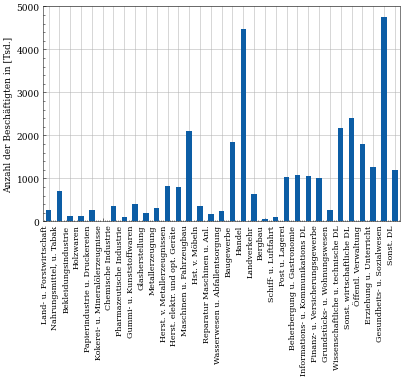

In [173]:
plot_bar(df_plot/1000, w_cm=16, rot=90, ylabel='Anzahl der Beschäftigten in [Tsd.]',fs_xticks=8, fig_name='Beschaftigte_2018', legend=False)

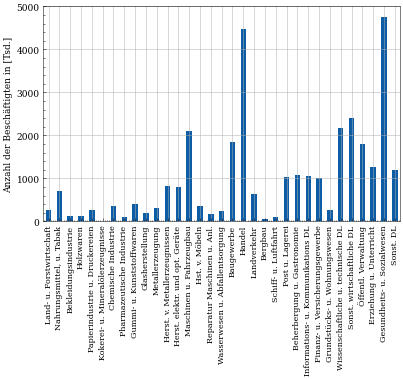

In [200]:
plot_bar(df_plot/1000, w_cm=16, rot=90, ylabel='Anzahl der Beschäftigten in [Tsd.]',fs_xticks=8, fig_name='Beschaftigte_2017', legend=False)

#### Plot BWS

In [102]:
df_BWS = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=1, header=[0,1], index_col=0)
df_BWS['Durchschnitt'] = df_BWS.mean(axis=1)
df_BWS['Summe'] = df_BWS.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_BWS.iloc[:, col_slice[[5,12,15,18, 19,23, 24]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot.head()

,Herstellung von Nahrungs- und Futtermitteln,"Herstellung von Papier, Pappe und Waren daraus",Herstellung von chemischen Erzeugnissen,"Herstellung von Glas und Glaswaren, Keramik, Verarbeitung von Steinen und Erden",Metallerzeugung und -bearbeitung,Maschinenbau,Herstellung von Kraftwagen und Kraftwagenteilen
2015,29795836.0,10249216.0,39820214.0,13572929.0,18858851.0,82271875.0,96380552.0
2016,32644166.0,10492563.0,42259022.0,14681030.0,19176665.0,85353839.0,107044021.0
2017,32978938.0,10708109.0,45445108.0,15124370.0,20736379.0,91600696.0,105985303.0
2018,33548422.0,11456037.0,42246597.0,15924338.0,22209720.0,95404750.0,105260940.0
2019,34447429.0,11257919.0,40633463.0,16110285.0,19202209.0,92970351.0,102048712.0


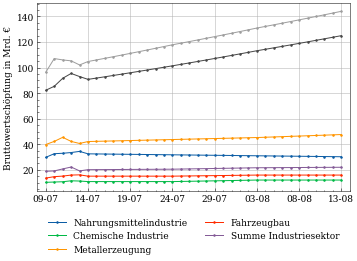

In [140]:

#plot_line(df_plot/1000000, ylim=(0,350), xlim=(2000, 2020), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'], fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

plot_line(df_plot/1000000, w_cm=14, f=1, labels=['Nahrungsmittelindustrie', 'Chemische Industrie', 'Metallerzeugung', 'Fahrzeugbau', 'Summe Industriesektor'],
         fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Bruttowertschöpfung in Mrd. €', xlim=(2014, 2051))

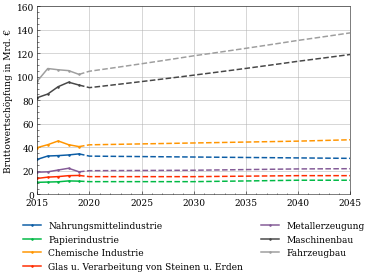

In [104]:
plot_multi_line([df_plot1/1000000, df_plot2/1000000], w_cm=14, ylim=(0,160), xlim=(2015, 2045),
                labels=['Nahrungsmittelindustrie', 'Papierindustrie','Chemische Industrie',  
                        'Glas u. Verarbeitung von Steinen u. Erden','Metallerzeugung', 'Maschinenbau','Fahrzeugbau'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Bruttowertschöpfung in Mrd. €', fig_name='BWS_Prognose')

#### plot Beschäftigte prognose

In [71]:
df_emp = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=2, header=[0,1], index_col=0)
df_emp['Summe'] = df_emp.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_emp.iloc[:, col_slice[[12,26, 31, 43,44,45]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot_emp =df_plot.copy()
df_plot.head()

,Einzelhandel (ohne Handel mit Kraftfahrzeugen),Erbringung von Finanzdienstleistungen,Verwaltung und Führung von Unternehmen und Betrieben; Unternehmensberatung,"Öffentliche Verwaltung, Verteidigung; Sozialversicherung",Erziehung und Unterricht,Gesundheitswesen
2015,2341363.0,661596.0,621583.0,1721059.0,1184260.0,2338429.0
2016,2384846.0,648699.0,641041.0,1762296.0,1226198.0,2386229.0
2017,2420456.0,634664.0,678721.0,1789273.0,1266851.0,2437185.0
2018,2448806.0,624480.0,712344.0,1823784.0,1297011.0,2487503.0
2019,2462599.0,619977.0,743250.0,1866922.0,1329298.0,2554965.0


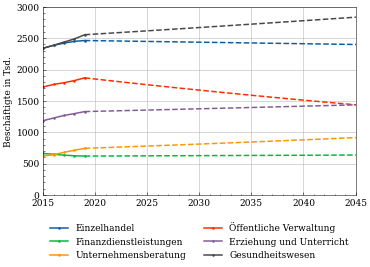

In [72]:
plot_multi_line([df_plot1/1000, df_plot2/1000], w_cm=14, ylim=(0,3000), xlim=(2015, 2045),
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','Öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Beschäftigte in Tsd.', fig_name='BEsch_Prognose')

#### plot EBF

In [73]:
df_ebf = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=3, header=[0,1], index_col=0)
df_ebf['Summe'] = df_ebf.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_ebf.iloc[:, col_slice[[12,26, 31, 43,44,45]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot_ebf =df_plot.copy()

df_plot.head()

,Einzelhandel (ohne Handel mit Kraftfahrzeugen),Erbringung von Finanzdienstleistungen,Verwaltung und Führung von Unternehmen und Betrieben; Unternehmensberatung,"Öffentliche Verwaltung, Verteidigung; Sozialversicherung",Erziehung und Unterricht,Gesundheitswesen
2015,1.749533e+08,1.970714e+07,3.590219e+07,9.793055e+07,7.636784e+07,6.316872e+07
2016,1.788827e+08,1.941460e+07,3.710233e+07,1.003599e+08,7.932165e+07,6.476217e+07
2017,1.822466e+08,1.908463e+07,3.936409e+07,1.019805e+08,8.220995e+07,6.645522e+07
2018,1.850850e+08,1.886745e+07,4.139923e+07,1.040334e+08,8.443260e+07,6.814525e+07
2019,1.868379e+08,1.882023e+07,4.328436e+07,1.065821e+08,8.680736e+07,7.032152e+07


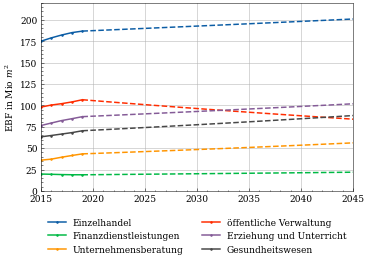

In [74]:
plot_multi_line([df_plot1/1000000, df_plot2/1000000], w_cm=14, xlim=(2015, 2045),ylim=(0,220),
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='EBF in Mio $m^2$', fig_name='EBF_Prognose')

In [75]:
df_plot = df_plot_ebf.div(df_plot_emp)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]

In [76]:
plot_multi_line([df_plot1, df_plot2], w_cm=14, xlim=(2015, 2045)
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='spez. EBF in $m^2$ pro Person')

SyntaxError: invalid syntax (2272230423.py, line 2)

#### Plots of BSP

In [2]:
df_bsp = (pd.read_excel("./data_in/temporal/Schichtprofile_timestamp_BE_2015.xlsx", header=[0], usecols=[0,1,2,3,4,5,6,7,8,9], 
                        index_col=[0], sheet_name="Schichtprofile_timestamp_BE_201"))
df_bsp.tail()

FileNotFoundError: [Errno 2] No such file or directory: './data_in/temporal/Schichtprofile_timestamp_BE_2015.xlsx'

In [ ]:
df_bsp_in_W=(df_bsp*4000000)
df_bsp_in_W.set_index(pd.to_datetime(df_bsp_in_W.index, utc=True), inplace=True)

In [ ]:
fontsize=15

plt.rcParams.update({'font.size': fontsize})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
df_bsp_in_W.loc[df_bsp_in_W.index.isocalendar().week == 21][['S1_WT', 'S2_WT', 'S3_WT']].plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize)

#ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Last in W (Jahresverbrauch 1 MWh)', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=3)

plt.savefig('../Plots/BSP_Example.png', bbox_inches="tight", dpi=150)

#### Plot SLP

In [3]:
df_slp = pd.read_excel("./data_in/temporal/Power Load Profiles/39_VDEW_Strom_Repräsentative Profile_G0.xlsx", header=[2], usecols=[0,1,2,3], index_col=[0],nrows=96)
df_slp.head()

,Samstag,Sonntag,Werktag
[W],,,
00:15:00,70.0,63.2,65.5
00:30:00,73.0,61.0,62.6
00:45:00,75.9,58.9,59.6
01:00:00,77.6,57.0,57.0
01:15:00,77.1,55.3,54.8


In [4]:
df_slp['neu']=pd.date_range("2018-01-01 00:15:00", periods=96, freq="15T")#.time
df_slp.set_index('neu', inplace=True)

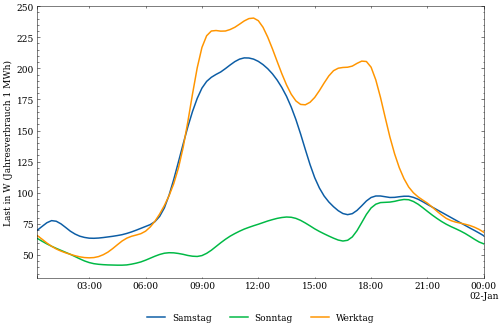

In [6]:
fontsize=9

plt.rcParams.update({'font.size': fontsize})
# plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
df_slp.plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize)

#ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Last in W (Jahresverbrauch 1 MWh)', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=3)

#plt.savefig('../Plots/SLP_Example_Jan.png', bbox_inches="tight", dpi=150)

#### Plot BLP

In [7]:
df_industry_blp_wz17 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                        .rename(columns={"Mean_Value_01001":"Papierherstellung"}))
df_industry_blp_wz21 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ21_Pharmazeutische Erzeugnisse_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                       .rename(columns={"Mean_Value_01001":"Pharmazeutische Erzeugnisse"}))
df_industry_blp_wz87 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ87_Heime_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                       .rename(columns={"Mean_Value_01001":"Heime"}))

FileNotFoundError: [Errno 2] No such file or directory: './data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv'

In [ ]:
new_df= pd.concat([df_industry_blp_wz17, df_industry_blp_wz21, df_industry_blp_wz87], axis=1).set_index(pd.to_datetime(df_industry_blp_wz17.index))
new_df.sum()

In [ ]:
new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()

In [ ]:
year= 2019
fontsize=15

plt.rcParams.update({'font.size': fontsize})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
new_df.loc[new_df.index.isocalendar().week == 20].plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize)
#ax.xaxis.set_tick_params(labelsize=fontsize)
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('Normierte Last in kW', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=2 )
#plt.text(0.5, .95, ('Energiemenge: ' + str(int(round(df_fc.loc[df_fc.index.year==year].sum().sum()/1000,1)))+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='black')

plt.savefig('../Plots/BLP_Example.png', bbox_inches="tight", dpi=150)

#### Temperature


In [111]:
#def plot_source_temps(lk=11000, **kwargs):
"""
Plots the heat source temperatures of water, air and ground
Parameters
----------
lk : int, default 11000 (Berlin)

"""

# get base year
year = 2018

# change index to datetime
if ((year % 4 == 0)
        & (year % 100 != 0)
        | (year % 4 == 0)
        & (year % 100 == 0)
        & (year % 400 == 0)):
    periods = 35136
else:
    periods = 35040

date = pd.date_range((str(year) + '-01-01'), periods= periods/4, freq='H')

# get source temperatures
soil_t = heat.soil_temp(year)
soil_t.index = date
ground_t = soil_t.sub(5)

air_t = data.ambient_T(year=year)
air_t = heat.change_nuts3_to_ags(air_t)
air_t.index = date

water_t = pd.DataFrame(index=soil_t.index, columns=soil_t.columns, data=5)
lw=0.5


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\heat.py:1762: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  soil_t[ags_lk] = df.loc[:, lat].loc[:, lon]


2022-12-11 22:19:16 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


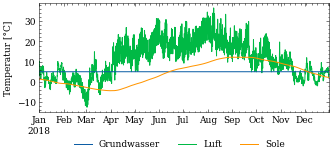

In [126]:
# plot
lk=11000
fs=9
w_cm=13
w_in=w_cm/2.5
plt.rcParams.update({'font.size':fs})
lw=1
f=1.6
coords=(0.5, -0.1)
fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))

water_t.loc[:,lk].plot(ax=ax, linewidth=lw)
air_t.loc[:,lk].plot(ax=ax, zorder=1, linewidth=lw)
ground_t.loc[:,lk].plot(ax=ax, linewidth=lw)
fig.legend(['Grundwasser','Luft','Sole'],
        loc = 'upper center',fontsize=fs, ncol=3, bbox_to_anchor=(0.5,-0.01))
ax.set_ylabel('Temperatur [°C]')
plt.savefig(path_plots + 'temp_2018.svg', bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\heat.py:1762: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  soil_t[ags_lk] = df.loc[:, lat].loc[:, lon]


2022-12-11 22:17:30 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


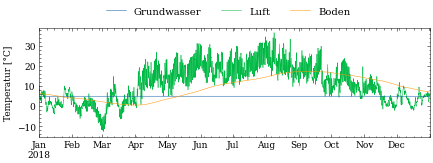

In [107]:
plot_source_temps(year=2018)
#plt.savefig('./data_out/temp_2018.png',bbox_inches='tight',dpi=150)

In [60]:
df_plot[2025].sum()/1000000

151.48517484165953

In [61]:
df_plot[2035].sum()/1000000

133.24199557687902

In [63]:
df_plot[2045].sum()/1000000

131.7187830720246

In [37]:
df_elec_ind = spatial.disagg_applications_eff(source='power', sector='industry', year=2018)

In [45]:
region_dict = config.dict_region_code(keys='ags_lk', values='name')
region_dict

{3152: 'Göttingen',
 3156: 'Osterode am Harz',
 1001: 'Flensburg, Kreisfreie Stadt',
 1002: 'Kiel, Kreisfreie Stadt',
 1003: 'Lübeck, Kreisfreie Stadt',
 1004: 'Neumünster, Kreisfreie Stadt',
 1051: 'Dithmarschen',
 1053: 'Herzogtum Lauenburg',
 9774: 'Günzburg',
 1054: 'Nordfriesland',
 1055: 'Ostholstein',
 1056: 'Pinneberg',
 1057: 'Plön',
 1058: 'Rendsburg-Eckernförde',
 1059: 'Schleswig-Flensburg',
 1060: 'Segeberg',
 1061: 'Steinburg',
 1062: 'Stormarn',
 2000: 'Hamburg',
 3101: 'Braunschweig, Kreisfreie Stadt',
 3102: 'Salzgitter, Kreisfreie Stadt',
 3103: 'Wolfsburg, Kreisfreie Stadt',
 3151: 'Gifhorn',
 3153: 'Goslar',
 3154: 'Helmstedt',
 3155: 'Northeim',
 3157: 'Peine',
 3158: 'Wolfenbüttel',
 3159: 'Göttingen',
 3241: 'Region Hannover',
 3251: 'Diepholz',
 3252: 'Hameln-Pyrmont',
 3254: 'Hildesheim',
 3255: 'Holzminden',
 3256: 'Nienburg (Weser)',
 3257: 'Schaumburg',
 3351: 'Celle',
 3352: 'Cuxhaven',
 3353: 'Harburg',
 3354: 'Lüchow-Dannenberg',
 3355: 'Lüneburg, Landkre

In [77]:
df_elec_ind.rename(index=region_dict).loc['Düsseldorf, Kreisfreie Stadt'].sum(level=0).max() #.plot(kind='bar', figsize=(8, (8/1.6)))#.idxmax() #

255335.52367779997

<AxesSubplot:xlabel='WZ'>

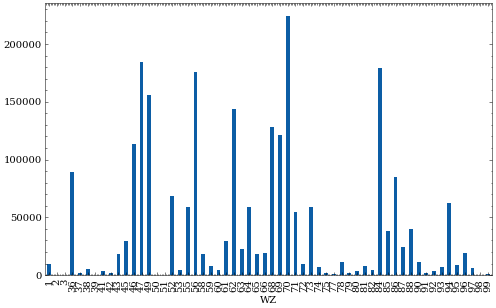

In [72]:
df_elec_cts.rename(index=region_dict).loc['Düsseldorf, Kreisfreie Stadt'].sum(level=0).plot(kind='bar', figsize=(8, (8/1.6)))#.idxmax()#

In [76]:
df_gas_cts.rename(index=region_dict).loc['Düsseldorf, Kreisfreie Stadt'].sum(level=0).idxmax() #.plot(kind='bar', figsize=(8, (8/1.6)))#.idxmax() #

84

In [61]:
df_gas_ind = spatial.disagg_applications_eff(source='gas', sector='industry', year=2018)
df_gas_cts = spatial.disagg_applications_eff(source='gas', sector='CTS', year=2018)
df_elec_cts = spatial.disagg_applications_eff(source='power', sector='CTS', year=2018)


In [19]:
# create results
df_results_power_cts = temporal.disagg_temporal_power_CTS_blp(detailed,
                                                              use_nuts3code,
                                                              year=year)
df_results_gas_cts = temporal.disagg_temporal_gas_CTS(detailed, use_nuts3code,
                                             year=year)

df_results_power_industry = temporal.disagg_temporal_industry_blp(source='power',
                                                         detailed=False,
                                                         use_nuts3code=False,
                                                         low=0.4,
                                                         no_self_gen=False,
                                                         year=year)
df_results_gas_industry = temporal.disagg_temporal_industry(source='gas',
                                                   detailed=False,
                                                   use_nuts3code=False,
                                                   low=0.4, no_self_gen=False,
                                                   year=year)

2022-04-29 21:49:57 disaggregator.temporal: INFO     Working on state: SH.
2022-04-29 21:49:57 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:07 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-04-29 21:50:07 disaggregator.temporal: INFO     Working on state: HH.
2022-04-29 21:50:07 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:14 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-04-29 21:50:14 disaggregator.temporal: INFO     Working on state: NI.
2022-04-29 21:50:14 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:21 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-04-29 21:50:21 disaggregator.temporal: INFO     Working on state: HB.
2022-04-29 21:50:21 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:28 disaggregator.temporal: INFO     ...

In [20]:
df_results_power_cts.to_csv("./data_out/Diss/04_results_lastgänge_regions_strom_cts_2018.csv")
df_results_gas_cts.to_csv("./data_out/Diss/04_results_lastgänge_regions_gas_cts_2018.csv")

df_results_power_industry.to_csv("./data_out/Diss/04_results_lastgänge_regions_strom_industry_2018.csv")
df_results_gas_industry.to_csv("./data_out/Diss/04_results_lastgänge_regions_gas_industry_2018.csv")